# Exploring Historic Wildfire Data

This notebook explores historic wildfire data from 1878-2019

Data can be downloaded here: [Historic Wildfires](https://www.sciencebase.gov/catalog/item/5ee13de982ce3bd58d7be7e7)



In [138]:
# Load desired packages

%matplotlib inline

import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import fiona

# change default figsize
plt.rcParams['figure.figsize'] = (25, 15)

# plot style
plt.style.use('seaborn')

In [3]:
# Load wildfire dataset
fires = gpd.read_file('../rawData/Shapefile/US_Wildfires_1878_2019.shp')

In [139]:
# Inspect data
fires.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 65845 entries, 0 to 65844
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   FireName    65845 non-null  object  
 1   FireCode    65845 non-null  object  
 2   FireYear    65845 non-null  int64   
 3   IgntDate    34099 non-null  object  
 4   ContrlDate  23108 non-null  object  
 5   ContnDate   7196 non-null   object  
 6   Acres       65845 non-null  float64 
 7   Hectares    65845 non-null  float64 
 8   DataSrc     65845 non-null  object  
 9   DataNotes   65845 non-null  object  
 10  FireCause   65845 non-null  object  
 11  FoundIn     65845 non-null  object  
 12  FndNames    65845 non-null  object  
 13  FndCodes    65845 non-null  object  
 14  FndDates    65845 non-null  object  
 15  FireQual    65845 non-null  int64   
 16  Shape_Leng  65845 non-null  float64 
 17  Shape_Area  65845 non-null  float64 
 18  geometry    65845 non-null  geometry
d

In [140]:
# View data as a table
fires

,FireName,FireCode,FireYear,IgntDate,ContrlDate,ContnDate,Acres,Hectares,DataSrc,DataNotes,FireCause,FoundIn,FndNames,FndCodes,FndDates,FireQual,Shape_Leng,Shape_Area,geometry
0,414008,AK6535415457219840611,1984,1984-06-11,None,None,3169.156439,1282.513243,Monitoring Trends in Burn Severity,"First Tier Wildfires, polygon with largest acr...",No cause indicated,Alternate Fire Sources: Monitoring Trends in B...,Alternate Fire Names: 414008,Alternate Fire Codes: AK6535415457219840611,"Alternate Ignition, Controlled, and Contained ...",1,22876.846278,1.282513e+07,"POLYGON ((-154.61761 65.37700, -154.61268 65.3..."
1,414012,AK6621715235619840618,1984,1984-06-18,None,None,1964.386646,794.959774,Monitoring Trends in Burn Severity,"First Tier Wildfires, polygon with largest acr...",No cause indicated,Alternate Fire Sources: Monitoring Trends in B...,Alternate Fire Names: 414012,Alternate Fire Codes: AK6621715235619840618,"Alternate Ignition, Controlled, and Contained ...",1,17290.576444,7.949598e+06,"POLYGON ((-152.35902 66.23226, -152.34487 66.2..."
2,414057,AK6495716269319840702,1984,1984-07-02,None,None,1688.849283,683.453661,Monitoring Trends in Burn Severity,"First Tier Wildfires, polygon with largest acr...",No cause indicated,Alternate Fire Sources: Monitoring Trends in B...,Alternate Fire Names: 414057,Alternate Fire Codes: AK6495716269319840702,"Alternate Ignition, Controlled, and Contained ...",1,11226.497241,6.834537e+06,"POLYGON ((-162.68840 64.96873, -162.68733 64.9..."
3,414060,AK6379515502919840623,1984,1984-06-23,None,None,1399.226822,566.247506,Monitoring Trends in Burn Severity,"First Tier Wildfires, polygon with largest acr...",No cause indicated,Alternate Fire Sources: Monitoring Trends in B...,Alternate Fire Names: 414060,Alternate Fire Codes: AK6379515502919840623,"Alternate Ignition, Controlled, and Contained ...",1,18047.888216,5.662475e+06,"POLYGON ((-155.01554 63.81320, -155.01398 63.8..."
4,ABERT,OR4258812018119840809,1984,1984-08-09,None,None,7945.460289,3215.416542,Monitoring Trends in Burn Severity,"First Tier Wildfires, polygon with largest acr...",No cause indicated,Alternate Fire Sources: BLM National Fire Peri...,"Alternate Fire Names: Abert, Abert, ABERT","Alternate Fire Codes: M053, M053, OR4258812018...","Alternate Ignition, Controlled, and Contained ...",1,73017.681929,3.215417e+07,"POLYGON ((-120.12878 42.67433, -120.12909 42.6..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65840,Hot Springs,GHP4,2012,None,None,2012-10-04,33819.911344,13686.444642,Land Treatment Digital Library,"Third Tier Wildfires, polygon with largest acr...",Lightning,Alternate Fire Sources: Land Treatment Digital...,Alternate Fire Names: Hot Springs,Alternate Fire Codes: GHP4,"Alternate Ignition, Controlled, and Contained ...",3,113953.668293,1.368644e+08,"POLYGON ((-117.39321 41.41770, -117.39149 41.4..."
65841,Owyhee,HM3X,2012,None,None,2012-07-07,46548.683372,18837.600479,Land Treatment Digital Library,"Third Tier Wildfires, polygon with largest acr...",Lightning,Alternate Fire Sources: Land Treatment Digital...,Alternate Fire Names: Owyhee,Alternate Fire Codes: HM3X,"Alternate Ignition, Controlled, and Contained ...",3,133304.042159,1.883760e+08,"MULTIPOLYGON (((-117.15126 43.58360, -117.1512..."
65842,Bone Creek Basin,JEL8,2013,None,None,2013-08-26,20484.713703,8289.876850,Land Treatment Digital Library,"Third Tier Wildfires, polygon with largest acr...",Lightning,Alternate Fire Sources: Land Treatment Digital...,Alternate Fire Names: Bone Creek Basin,Alternate Fire Codes: JEL8,"Alternate Ignition, Controlled, and Contained ...",3,72128.606568,8.289877e+07,"MULTIPOLYGON (((-118.62305 42.48322, -118.6220..."
65843,Double J,HW5G,2013,None,None,2013-08-23,134.776482,54.542155,Land Treatment Digital Library,"Third Tier Wildfires, polygon with largest acr...",Lightning,Alternate Fire Sources: Land Treatment Digital...,Alternate Fire Names: Double J,Alternate Fire Codes: HW5G,"Alternate Ig

In [6]:
# Basic statistical measures

fires.groupby('FireYear').describe()

Acres                                                          \
           count          mean           std           min           25%   
FireYear                                                                   
1878         2.0  49323.898711  14347.099141  39178.967618  44251.433165   
1889        90.0   9248.857692  14947.246071     29.880295    824.081209   
1890        33.0   2844.077359   4753.023502     13.221893    251.013419   
1893         2.0   5809.187171   6953.648247    892.215342   3350.701257   
1894         6.0  10274.898434  16874.344717   1301.493972   2331.159823   
...          ...           ...           ...           ...           ...   
2015      2018.0   5350.126563  20879.077198      0.002612     19.795808   
2016      2159.0   2986.744162  15051.458037      0.002466     17.077070   
2017      2528.0   4246.361276  20991.715026      0.000860     17.661901   
2018      1834.0   3871.330894  25063.556629      0.001199      9.038604   
2019      1455.0   2826.651948  18404.631549      0.000780      9.424601   

                                                    Hectares                \
                   50%           75%            max    count          mean   
FireYear                                                                     
1878      49323.898711  54396.364258   59468.829804      2.0  19960.691274   
1889       3145.729938  12054.980250   98985.008853     90.0   3742.883224   
1890       1076.124255   2435.353814   21741.371830     33.0   1150.958290   
1893       5809.187171   8267.673086   10726.159001      2.0   2350.896720   
1894       4220.484962   5287.438940   44562.451666      6.0   4158.107548   
...                ...           ...            ...      ...           ...   
2015        204.668346   2340.577617  407461.216395   2018.0   2165.121318   
2016        131.180281   1473.229243  374523.359306   2159.0   1208.693548   
2017        141.727358   1665.693382  657298.930324   2528.0   1718.442959   
2018         53.749138    497.511562  677032.736045   1834.0   1566.673414   
2019         54.111900    425.426523  465280.633101   1455.0   1143.906470   

          ...    Shape_Leng               Shape_Area                \
          ...           75%           max      count          mean   
FireYear  ...                                                        
1878      ...  85811.803143  8.843972e+04        2.0  1.996069e+08   
1889      ...  51200.397373  4.442109e+05       90.0  3.742883e+07   
1890      ...  23091.126652  9.215747e+04       33.0  1.150958e+07   
1893      ...  39418.416039  4.906366e+04        2.0  2.350897e+07   
1894      ...  22843.096791  9.971916e+04        6.0  4.158108e+07   
...       ...           ...           ...        ...           ...   
2015      ...  21900.123984  1.114945e+06     2018.0  2.165121e+07   
2016      ...  16174.698695  1.390098e+06     2159.0  1.208694e+07   
2017      ...  19766.127789  8.533072e+05     2528.0  1.718443e+07   
2018      ...   9021.512535  1.133554e+06     1834.0  1.566673e+07   
2019      ...   8891.043479  9.516479e+05     1455.0  1.143906e+07   

                                                                  \
                   std           min           25%           50%   
FireYear                                                           
1878      5.806070e+07  1.585518e+08  1.790794e+08  1.996069e+08   
1889      6.048941e+07  1.209214e+05  3.334941e+06  1.273033e+07   
1890      1.923482e+07  5.350715e+04  1.015816e+06  4.354924e+06   
1893      2.814044e+07  3.610671e+06  1.355982e+07  2.350897e+07   
1894      6.828811e+07  5.266964e+06  9.433877e+06  1.707971e+07   
...                ...           ...           ...           ...   
2015      8.449470e+07  1.056970e+01  8.011086e+04  8.282641e+05   
2016      6.091114e+07  9.981314e+00  6.910851e+04  5.308682e+05   
2017      8.495053e+07  3.480467e+00  7.147524e+04  5.735508e+05   
2018      1.014287e+08  4.850550e+00  3.657797e+04  2.17

In [7]:
# Fire statistics by fire year

fires.groupby('FireYear').agg(['count', 'min', 'max', 'mean'])

Acres                                            Hectares  \
         count           min            max          mean    count   
FireYear                                                             
1878         2  39178.967618   59468.829804  49323.898711        2   
1889        90     29.880295   98985.008853   9248.857692       90   
1890        33     13.221893   21741.371830   2844.077359       33   
1893         2    892.215342   10726.159001   5809.187171        2   
1894         6   1301.493972   44562.451666  10274.898434        6   
...        ...           ...            ...           ...      ...   
2015      2018      0.002612  407461.216395   5350.126563     2018   
2016      2159      0.002466  374523.359306   2986.744162     2159   
2017      2528      0.000860  657298.930324   4246.361276     2528   
2018      1834      0.001199  677032.736045   3871.330894     1834   
2019      1455      0.000780  465280.633101   2826.651948     1455   

                                                    FireQual          \
                   min            max          mean    count min max   
FireYear                                                               
1878      15855.179690   24066.202858  19960.691274        2   2   2   
1889         12.092137   40057.847293   3742.883224       90   2   2   
1890          5.350715    8798.428800   1150.958290       33   2   2   
1893        361.067058    4340.726381   2350.896720        2   2   2   
1894        526.696390   18033.800315   4158.107548        6   2   2   
...                ...            ...           ...      ...  ..  ..   
2015          0.001057  164893.849818   2165.121318     2018   1   2   
2016          0.000998  151564.360184   1208.693548     2159   1   2   
2017          0.000348  265999.674917   1718.442959     2528   1   3   
2018          0.000485  273985.669819   1566.673414     1834   2   2   
2019          0.000316  188292.558287   1143.906470     1455   2   2   

                   Shape_Leng                                            \
              mean      count           min           max          mean   
FireYear                                                                  
1878      2.000000          2  77928.065395  8.843972e+04  83183.890560   
1889      2.000000         90   1973.447881  4.442109e+05  37081.849381   
1890      2.000000         33   1086.182788  9.215747e+04  19305.894841   
1893      2.000000          2  10482.691501  4.906366e+04  29773.174526   
1894      2.000000          6  13950.475753  9.971916e+04  31726.465449   
...            ...        ...           ...           ...           ...   
2015      1.625372       2018     13.555465  1.114945e+06  23941.254070   
2016      1.672070       2159     15.386214  1.390098e+06  16911.940201   
2017      1.666930       2528      8.324163  8.533072e+05  21826.336879   
2018      2.000000       1834      9.038563  1.133554e+06  14836.205726   
2019      2.000000       1455      8.538432  9.516479e+05  13606.805111   

         Shape_Area                                            
              count           min           max          mean  
FireYear                                                       
1878              2  1.585518e+08  2.406620e+08  1.996069e+08  
1889             90  1.209214e+05  4.005785e+08  3.742883e+07  
1890             33  5.350715e+04  8.798429e+07  1.150958e+07  
1893              2  3.610671e+06  4.340726e+07  2.350897e+07  
1894              6  5.266964e+06  1.803380e+08  4.158108e+07  
...             ...           ...           ...           ...  
2015           2018  1.056970e+01  1.648938e+09  2.165121e+07  
2016           2159  9.981314e+00  1.515644e+09  1.208694e+07  
2017           2528  3.480467e+00  2.659997e+09  1.718443e+07  
2018           1834  4.850550e+00  2.739857e+09  1.566673e+07  
2019           1455  3.156407e+00  1.882926e+09  1.143906e+07  

[128 rows x 20 columns]

## Inspecting the CRS 

Let's take a look at the CRS and convert to WGS84 

In [8]:
# Let's take a look at the CRS before we go too far

fires.crs

<Projected CRS: ESRI:102008>
Name: North_America_Albers_Equal_Area_Conic
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Albers Equal Area
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [9]:
# Inspect the coordinates

fires.geometry

0        POLYGON ((-2729116.221 3783619.593, -2728840.2...
1        POLYGON ((-2587275.964 3793164.935, -2586775.6...
2        POLYGON ((-3073104.885 3996965.523, -3073150.7...
3        POLYGON ((-2841528.411 3660892.172, -2841473.4...
4        POLYGON ((-1839066.540 551133.989, -1839104.37...
                               ...                        
65840    POLYGON ((-1667571.260 356308.189, -1667502.05...
65841    MULTIPOLYGON (((-1592394.618 601674.732, -1592...
65842    MULTIPOLYGON (((-1731902.100 500870.629, -1731...
65843    POLYGON ((-1953928.684 513534.279, -1953920.93...
65844    POLYGON ((-1893854.501 181970.815, -1893813.07...
Name: geometry, Length: 65845, dtype: geometry

In [10]:
# Convert CRS to WGS84

fires.to_crs(epsg=4326, inplace=True)

In [11]:
# Verify conversion

fires.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [12]:
# See how coordinates changed

fires.geometry

0        POLYGON ((-154.61761 65.37700, -154.61268 65.3...
1        POLYGON ((-152.35902 66.23226, -152.34487 66.2...
2        POLYGON ((-162.68840 64.96873, -162.68733 64.9...
3        POLYGON ((-155.01554 63.81320, -155.01398 63.8...
4        POLYGON ((-120.12878 42.67433, -120.12909 42.6...
                               ...                        
65840    POLYGON ((-117.39321 41.41770, -117.39149 41.4...
65841    MULTIPOLYGON (((-117.15126 43.58360, -117.1512...
65842    MULTIPOLYGON (((-118.62305 42.48322, -118.6220...
65843    POLYGON ((-121.43689 42.11573, -121.43676 42.1...
65844    POLYGON ((-119.63562 39.53064, -119.63536 39.5...
Name: geometry, Length: 65845, dtype: geometry

## Cleaning Data

Cleaning up the large dataset to a more manageable and useful size

In [13]:
# Let's narrow our data to the last century

centFire = fires[fires.FireYear >= 1920]

centFire

,FireName,FireCode,FireYear,IgntDate,ContrlDate,ContnDate,Acres,Hectares,DataSrc,DataNotes,FireCause,FoundIn,FndNames,FndCodes,FndDates,FireQual,Shape_Leng,Shape_Area,geometry
0,414008,AK6535415457219840611,1984,1984-06-11,None,None,3169.156439,1282.513243,Monitoring Trends in Burn Severity,"First Tier Wildfires, polygon with largest acr...",No cause indicated,Alternate Fire Sources: Monitoring Trends in B...,Alternate Fire Names: 414008,Alternate Fire Codes: AK6535415457219840611,"Alternate Ignition, Controlled, and Contained ...",1,22876.846278,1.282513e+07,"POLYGON ((-154.61761 65.37700, -154.61268 65.3..."
1,414012,AK6621715235619840618,1984,1984-06-18,None,None,1964.386646,794.959774,Monitoring Trends in Burn Severity,"First Tier Wildfires, polygon with largest acr...",No cause indicated,Alternate Fire Sources: Monitoring Trends in B...,Alternate Fire Names: 414012,Alternate Fire Codes: AK6621715235619840618,"Alternate Ignition, Controlled, and Contained ...",1,17290.576444,7.949598e+06,"POLYGON ((-152.35902 66.23226, -152.34487 66.2..."
2,414057,AK6495716269319840702,1984,1984-07-02,None,None,1688.849283,683.453661,Monitoring Trends in Burn Severity,"First Tier Wildfires, polygon with largest acr...",No cause indicated,Alternate Fire Sources: Monitoring Trends in B...,Alternate Fire Names: 414057,Alternate Fire Codes: AK6495716269319840702,"Alternate Ignition, Controlled, and Contained ...",1,11226.497241,6.834537e+06,"POLYGON ((-162.68840 64.96873, -162.68733 64.9..."
3,414060,AK6379515502919840623,1984,1984-06-23,None,None,1399.226822,566.247506,Monitoring Trends in Burn Severity,"First Tier Wildfires, polygon with largest acr...",No cause indicated,Alternate Fire Sources: Monitoring Trends in B...,Alternate Fire Names: 414060,Alternate Fire Codes: AK6379515502919840623,"Alternate Ignition, Controlled, and Contained ...",1,18047.888216,5.662475e+06,"POLYGON ((-155.01554 63.81320, -155.01398 63.8..."
4,ABERT,OR4258812018119840809,1984,1984-08-09,None,None,7945.460289,3215.416542,Monitoring Trends in Burn Severity,"First Tier Wildfires, polygon with largest acr...",No cause indicated,Alternate Fire Sources: BLM National Fire Peri...,"Alternate Fire Names: Abert, Abert, ABERT","Alternate Fire Codes: M053, M053, OR4258812018...","Alternate Ignition, Controlled, and Contained ...",1,73017.681929,3.215417e+07,"POLYGON ((-120.12878 42.67433, -120.12909 42.6..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65840,Hot Springs,GHP4,2012,None,None,2012-10-04,33819.911344,13686.444642,Land Treatment Digital Library,"Third Tier Wildfires, polygon with largest acr...",Lightning,Alternate Fire Sources: Land Treatment Digital...,Alternate Fire Names: Hot Springs,Alternate Fire Codes: GHP4,"Alternate Ignition, Controlled, and Contained ...",3,113953.668293,1.368644e+08,"POLYGON ((-117.39321 41.41770, -117.39149 41.4..."
65841,Owyhee,HM3X,2012,None,None,2012-07-07,46548.683372,18837.600479,Land Treatment Digital Library,"Third Tier Wildfires, polygon with largest acr...",Lightning,Alternate Fire Sources: Land Treatment Digital...,Alternate Fire Names: Owyhee,Alternate Fire Codes: HM3X,"Alternate Ignition, Controlled, and Contained ...",3,133304.042159,1.883760e+08,"MULTIPOLYGON (((-117.15126 43.58360, -117.1512..."
65842,Bone Creek Basin,JEL8,2013,None,None,2013-08-26,20484.713703,8289.876850,Land Treatment Digital Library,"Third Tier Wildfires, polygon with largest acr...",Lightning,Alternate Fire Sources: Land Treatment Digital...,Alternate Fire Names: Bone Creek Basin,Alternate Fire Codes: JEL8,"Alternate Ignition, Controlled, and Contained ...",3,72128.606568,8.289877e+07,"MULTIPOLYGON (((-118.62305 42.48322, -118.6220..."
65843,Double J,HW5G,2013,None,None,2013-08-23,134.776482,54.542155,Land Treatment Digital Library,"Third Tier Wildfires, polygon with largest acr...",Lightning,Alternate Fire Sources: Land Treatment Digital...,Alternate Fire Names: Double J,Alternate Fire Codes: HW5G,"Alternate Ig

In [15]:
# create a GeoJSON of the data

centFire.to_file('../rawData/fireCentury.geojson', driver="GeoJSON")

In [141]:
# reload the century fire data in order to drop unwanted columns

centFire = gpd.read_file('../rawData/fireCentury.geojson')

In [142]:
# List of all column names, in order to identify which columns can be dropped

centFire.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 62744 entries, 0 to 62743
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   FireName    62744 non-null  object  
 1   FireCode    62744 non-null  object  
 2   FireYear    62744 non-null  int64   
 3   IgntDate    34077 non-null  object  
 4   ContrlDate  22878 non-null  object  
 5   ContnDate   7196 non-null   object  
 6   Acres       62744 non-null  float64 
 7   Hectares    62744 non-null  float64 
 8   DataSrc     62744 non-null  object  
 9   DataNotes   62744 non-null  object  
 10  FireCause   62744 non-null  object  
 11  FoundIn     62744 non-null  object  
 12  FndNames    62744 non-null  object  
 13  FndCodes    62744 non-null  object  
 14  FndDates    62744 non-null  object  
 15  FireQual    62744 non-null  int64   
 16  Shape_Leng  62744 non-null  float64 
 17  Shape_Area  62744 non-null  float64 
 18  geometry    62744 non-null  geometry
d

In [16]:
# Inspect null values

centFire.isnull().sum()

FireName          0
FireCode          0
FireYear          0
IgntDate      28667
ContrlDate    39866
ContnDate     55548
Acres             0
Hectares          0
DataSrc           0
DataNotes         0
FireCause         0
FoundIn           0
FndNames          0
FndCodes          0
FndDates          0
FireQual          0
Shape_Leng        0
Shape_Area        0
geometry          0
dtype: int64

In [20]:
# Columns to be dropped

centFire.drop(['FireCode', 'DataSrc', 'DataNotes', 'FoundIn', 'FndNames', 'FndCodes', 'FndDates', 'FireQual', 'Shape_Leng', 'Shape_Area'], axis=1, inplace=True)

In [25]:
# Verify the cleaned dataset

centFire.head()

,FireName,FireYear,IgntDate,ContrlDate,ContnDate,Acres,Hectares,FireCause,geometry
0,414008,1984,1984-06-11,None,None,3169.156439,1282.513243,No cause indicated,"POLYGON ((-154.61761 65.37700, -154.61268 65.3..."
1,414012,1984,1984-06-18,None,None,1964.386646,794.959774,No cause indicated,"POLYGON ((-152.35902 66.23226, -152.34487 66.2..."
2,414057,1984,1984-07-02,None,None,1688.849283,683.453661,No cause indicated,"POLYGON ((-162.68840 64.96873, -162.68733 64.9..."
3,414060,1984,1984-06-23,None,None,1399.226822,566.247506,No cause indicated,"POLYGON ((-155.01554 63.81320, -155.01398 63.8..."
4,ABERT,1984,1984-08-09,None,None,7945.460289,3215.416542,No cause indicated,"POLYGON ((-120.12878 42.67433, -120.12909 42.6..."


In [19]:
# Create a CSV of cleaned century fire data

centFire.to_csv('../data/fireCenturyClean.csv', index=False)

In [24]:
# create a GeoJSON of the cleaned data

centFire.to_file('../data/fireCenturyClean.geojson', driver="GeoJSON")

## Visualizing Wildfires

Below we visually dig into the wildfire data and discover that average fire size, number of fires per year, median fire size per year, and high-end outliers (megafires) are increasing every year. The median fire size per year is important as it shows how, holistically, wildfires are increasing in severity. Averages become skewed in higher directions when extremely high outliers (in this case megafires) are involved. The median shows that fire size of those fires that fall in the 50th percentile are increasing over time. This shows that not only are fires increasing in frequency and size, but megafires are also occurring more frequently.

In [148]:
# First let's load the fireCenturyClean back into the script

centFireClean = gpd.read_file('../data/fireCenturyClean.geojson')

centFireClean

,FireName,FireYear,IgntDate,ContrlDate,ContnDate,Acres,Hectares,FireCause,geometry
0,414008,1984,1984-06-11,None,None,3169.156439,1282.513243,No cause indicated,"POLYGON ((-154.61761 65.37700, -154.61268 65.3..."
1,414012,1984,1984-06-18,None,None,1964.386646,794.959774,No cause indicated,"POLYGON ((-152.35902 66.23226, -152.34487 66.2..."
2,414057,1984,1984-07-02,None,None,1688.849283,683.453661,No cause indicated,"POLYGON ((-162.68840 64.96873, -162.68733 64.9..."
3,414060,1984,1984-06-23,None,None,1399.226822,566.247506,No cause indicated,"POLYGON ((-155.01554 63.81320, -155.01398 63.8..."
4,ABERT,1984,1984-08-09,None,None,7945.460289,3215.416542,No cause indicated,"POLYGON ((-120.12878 42.67433, -120.12909 42.6..."
...,...,...,...,...,...,...,...,...,...
62739,Hot Springs,2012,None,None,2012-10-04,33819.911344,13686.444642,Lightning,"POLYGON ((-117.39321 41.41770, -117.39149 41.4..."
62740,Owyhee,2012,None,None,2012-07-07,46548.683372,18837.600479,Lightning,"MULTIPOLYGON (((-117.15126 43.58360, -117.1512..."
62741,Bone Creek Basin,2013,None,None,2013-08-26,20484.713703,8289.876850,Lightning,"MULTIPOLYGON (((-118.62305 42.48322, -118.6220..."
62742,Double J,2013,None,None,2013-08-23,134.776482,54.542155,Lightning,"POLYGON ((-121.43689 42.11573, -121.43676 42.1..."


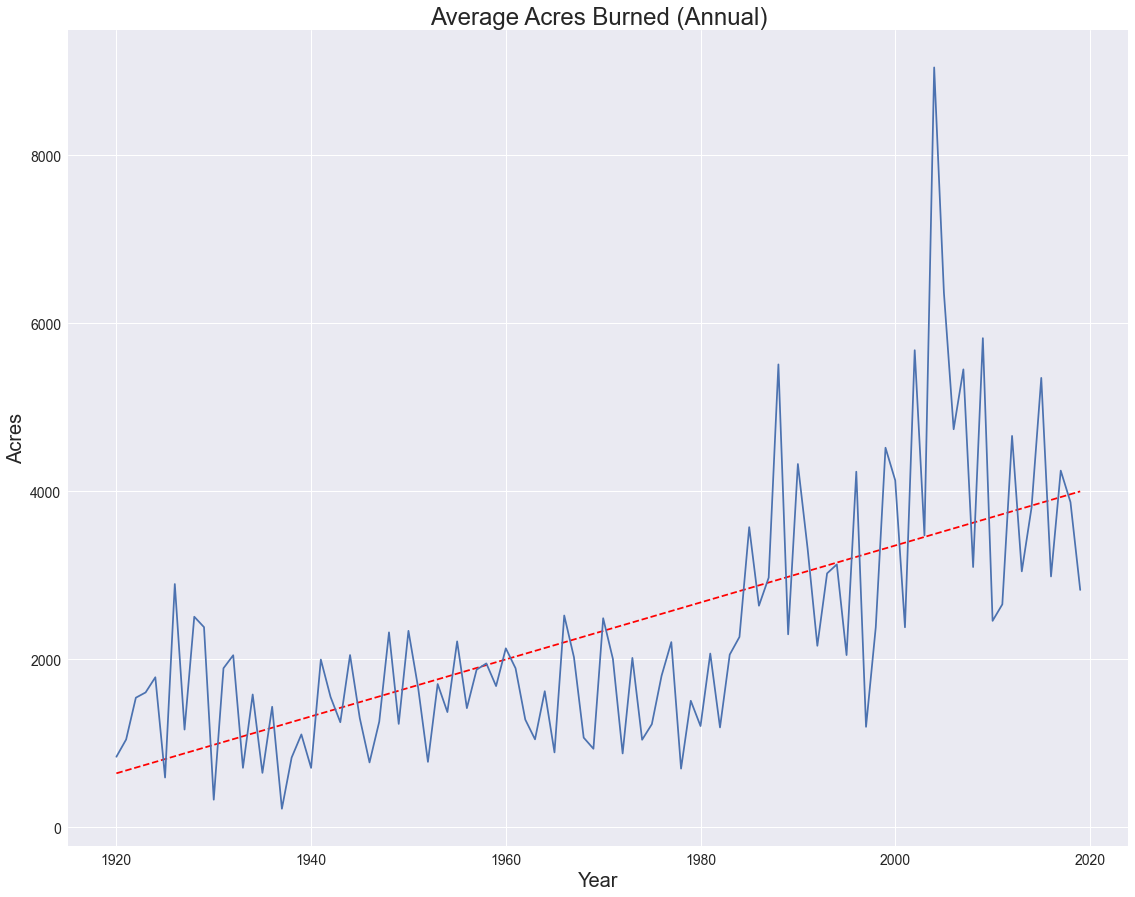

In [21]:
# Plot average fire size (in acres) each year with trendline

year = list(range(1920,2020))
value = centFireClean.groupby('FireYear').Acres.mean()

# create a figure and increase the size 
fig, ax = plt.subplots(figsize=(19, 15))

# plot paramaters
z = np.polyfit(year, value, 1)
p = np.poly1d(z)
ax.plot(year,p(year),"r--")
ax.plot(year, value)

plt.ylabel('Acres', fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

ax.set_title('Average Acres Burned (Annual)', fontsize=24);

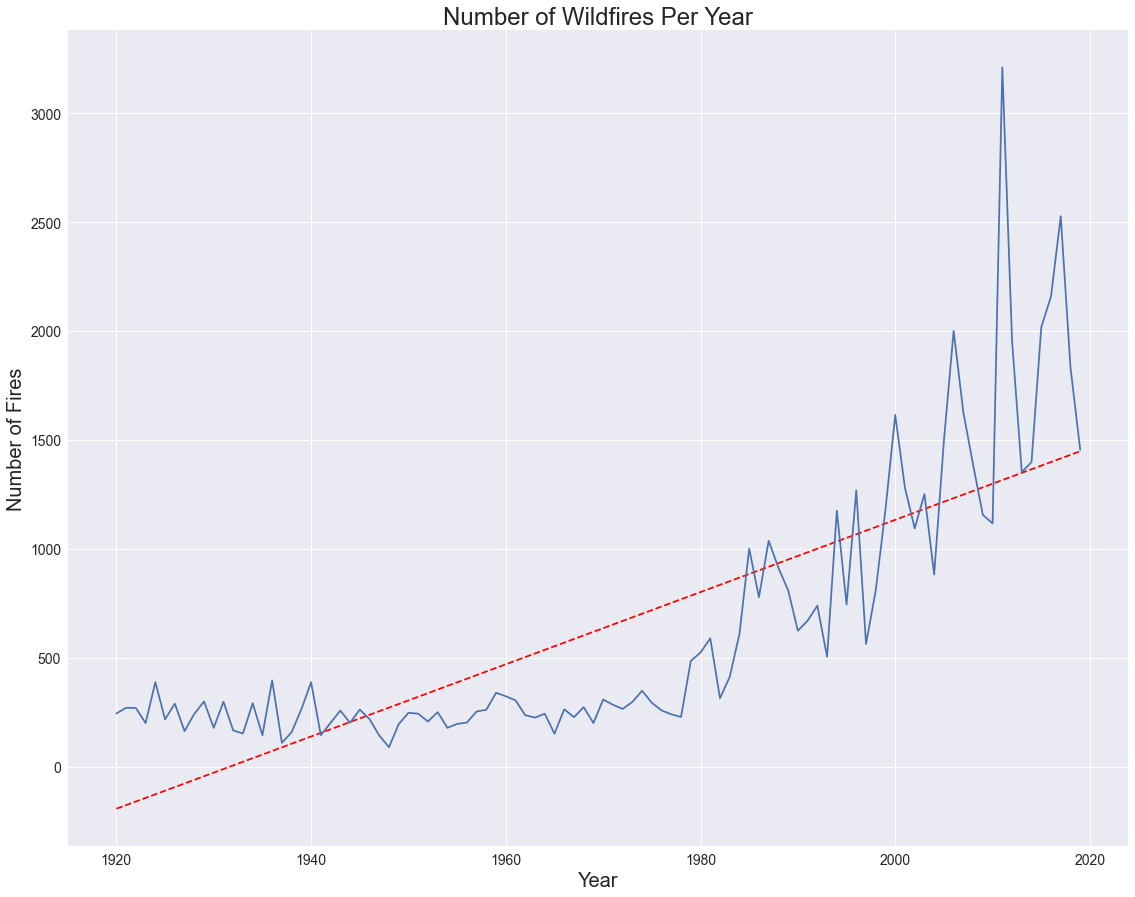

In [150]:
# Plot the number of wildfires each year, with a trendline

year = list(range(1920,2020))
value = centFireClean.groupby('FireYear').FireYear.count()

# create a figure and increase the size 
fig, ax = plt.subplots(figsize=(19, 15))

# plot paramaters
z = np.polyfit(year, value, 1)
p = np.poly1d(z)
ax.plot(year,p(year),"r--")
ax.plot(year, value)

plt.ylabel('Number of Fires', fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

ax.set_title('Number of Wildfires Per Year', fontsize=24);

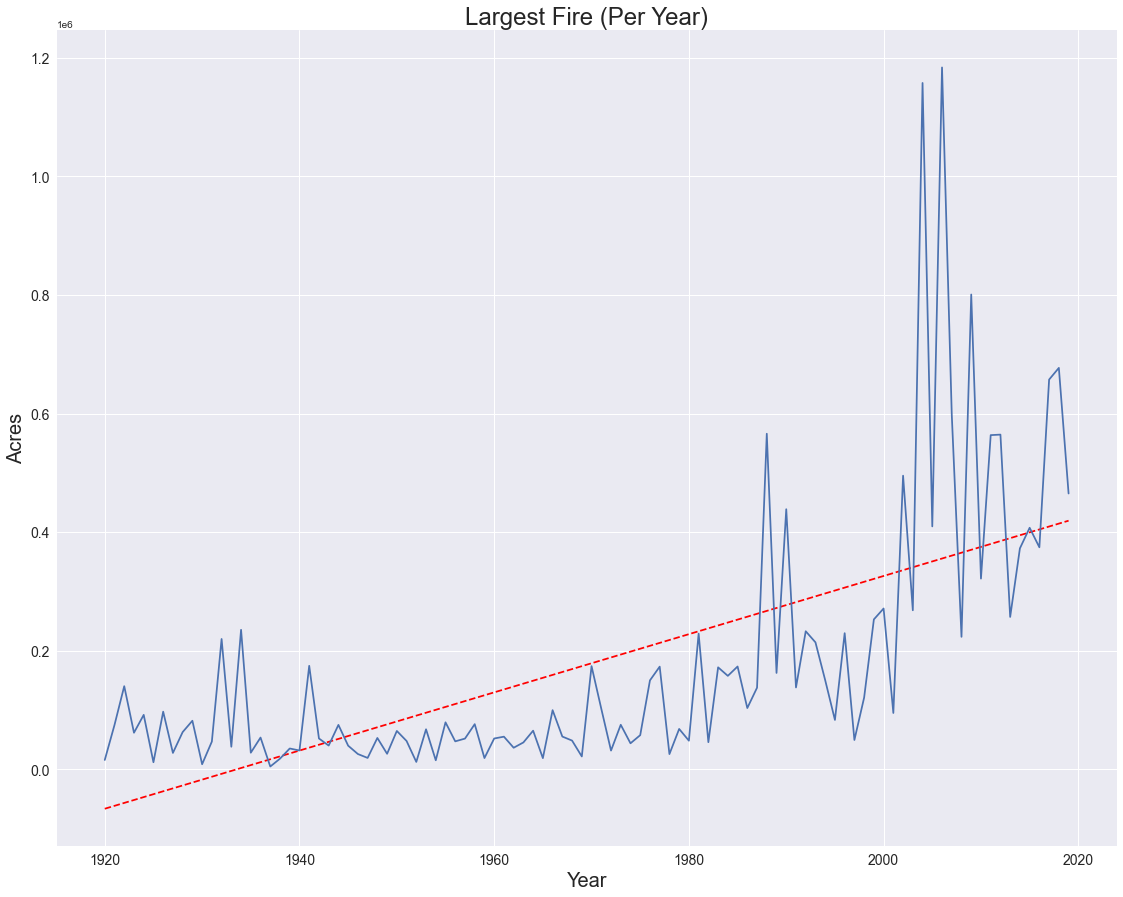

In [151]:
# Plot largest fire size (in acres) each year with trendline

year = list(range(1920,2020))
value = centFireClean.groupby('FireYear').Acres.max()

# create a figure and increase the size 
fig, ax = plt.subplots(figsize=(19, 15))

# plot paramaters
z = np.polyfit(year, value, 1)
p = np.poly1d(z)
ax.plot(year,p(year),"r--")
ax.plot(year, value)

plt.ylabel('Acres', fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

ax.set_title('Largest Fire (Per Year)', fontsize=24);

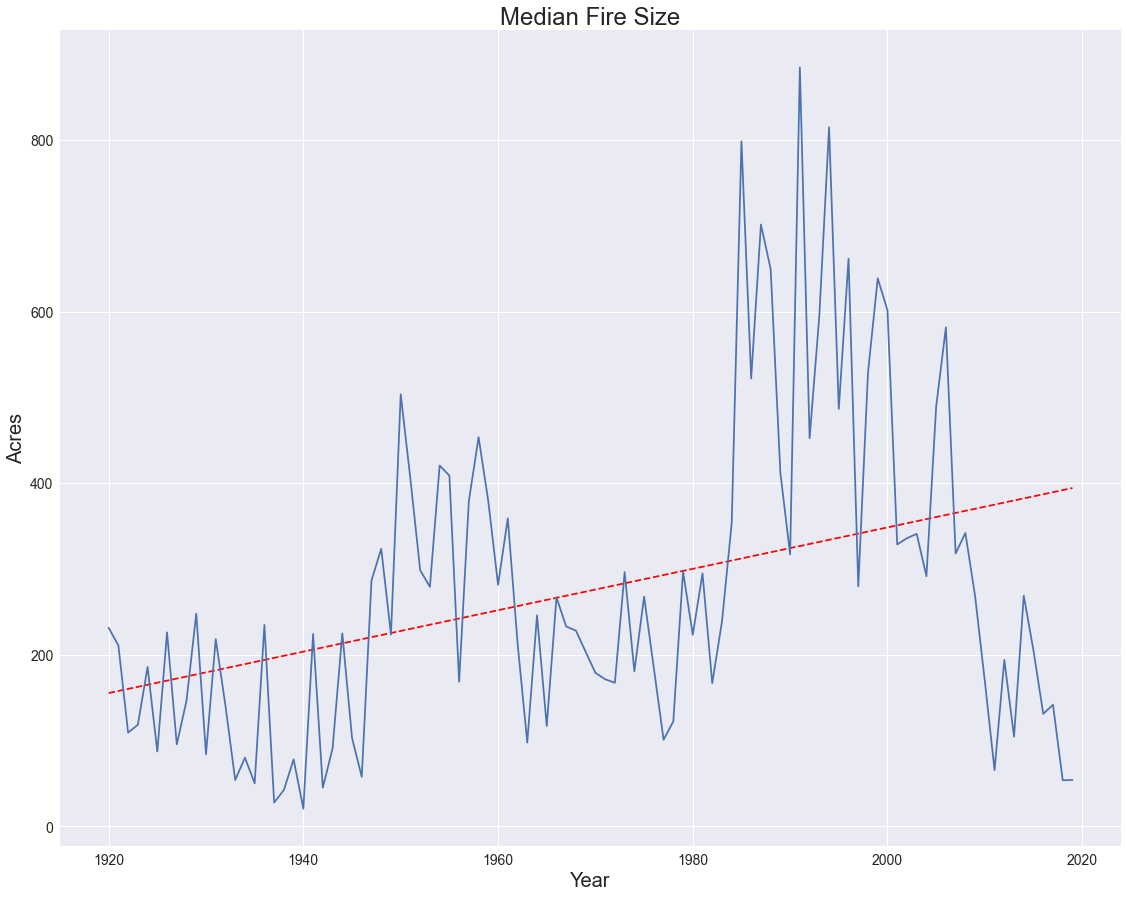

In [185]:
# Median fire size over the past century has increased. This tells us the high acreage outliers are not solely
# responsible for driving up the average fire size over time. 

year = list(range(1920,2020))
value = centFireClean.groupby('FireYear').Acres.median()

# create a figure and increase the size 
fig, ax = plt.subplots(figsize=(19, 15))

# plot paramaters
z = np.polyfit(year, value, 1)
p = np.poly1d(z)
ax.plot(year,p(year),"r--")
ax.plot(year, value)

plt.ylabel('Acres', fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

ax.set_title('Median Fire Size', fontsize=24);

In [186]:
value

FireYear
1920    231.513076
1921    210.883764
1922    109.297640
1923    118.385408
1924    185.772213
           ...    
2015    204.668346
2016    131.180281
2017    141.727358
2018     53.749138
2019     54.111900
Name: Acres, Length: 100, dtype: float64

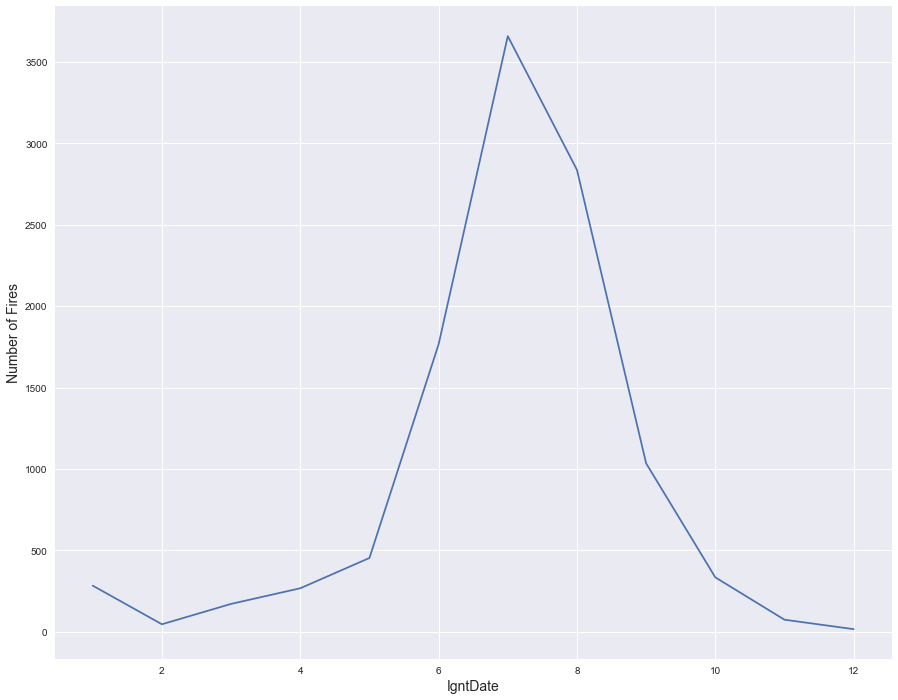

In [43]:
# Now let's take a closer look at the data by using our newly converted IngtDate and ContrlDate columns to 
# plot fire trends by month

# create a figure and increase the size 
fig, ax = plt.subplots(figsize=(15, 12))

months = hasBoth.IgntDate.dt.month

plt.ylabel('Number of Fires', fontsize=14)
plt.xlabel('Month', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

hasBoth.groupby(months).Acres.count().plot();

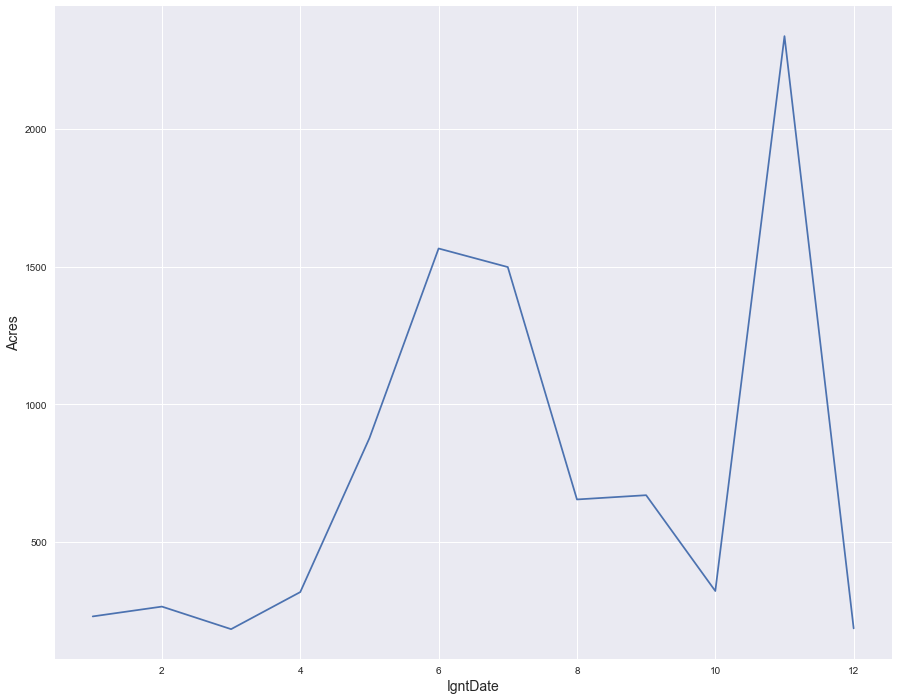

In [42]:
# Average fire size by month. This shows how a megafire can skew the average. Above we plotted the number of fires 
# each month. November has some of the fewest recorded wildfires. Yet the average fire size for November seen below
# is the highest of the dataset

# create a figure and increase the size 
fig, ax = plt.subplots(figsize=(15, 12))

plt.ylabel('Acres', fontsize=14)
plt.xlabel('Month', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

hasBoth.groupby(months).Acres.mean().plot();

In [26]:
# Create variables for each decade

fires20s = centFire[(centFire.FireYear <= 1929)]

fires30s = centFire[(centFire.FireYear >= 1930) & (centFire.FireYear <= 1939)]

fires40s = centFire[(centFire.FireYear >= 1940) & (centFire.FireYear <= 1949)]

fires50s = centFire[(centFire.FireYear >= 1950) & (centFire.FireYear <= 1959)]

fires60s = centFire[(centFire.FireYear >= 1960) & (centFire.FireYear <= 1969)]

fires70s = centFire[(centFire.FireYear >= 1970) & (centFire.FireYear <= 1979)]

fires80s = centFire[(centFire.FireYear >= 1980) & (centFire.FireYear <= 1989)]

fires90s = centFire[(centFire.FireYear >= 1990) & (centFire.FireYear <= 1999)]

fires2k = centFire[(centFire.FireYear >= 2000) & (centFire.FireYear <= 2009)]

fires2k10 = centFire[(centFire.FireYear >= 2010)]


In [27]:
# Create variables for acreage of fires each decade

acres20s = fires20s.Acres

acres30s = fires30s.Acres

acres40s = fires40s.Acres

acres50s = fires50s.Acres

acres60s = fires60s.Acres

acres70s = fires70s.Acres

acres80s = fires80s.Acres

acres90s = fires90s.Acres

acres2k = fires2k.Acres

acres2k10 = fires2k10.Acres

/usr/local/Caskroom/miniconda/base/envs/wildfires/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator


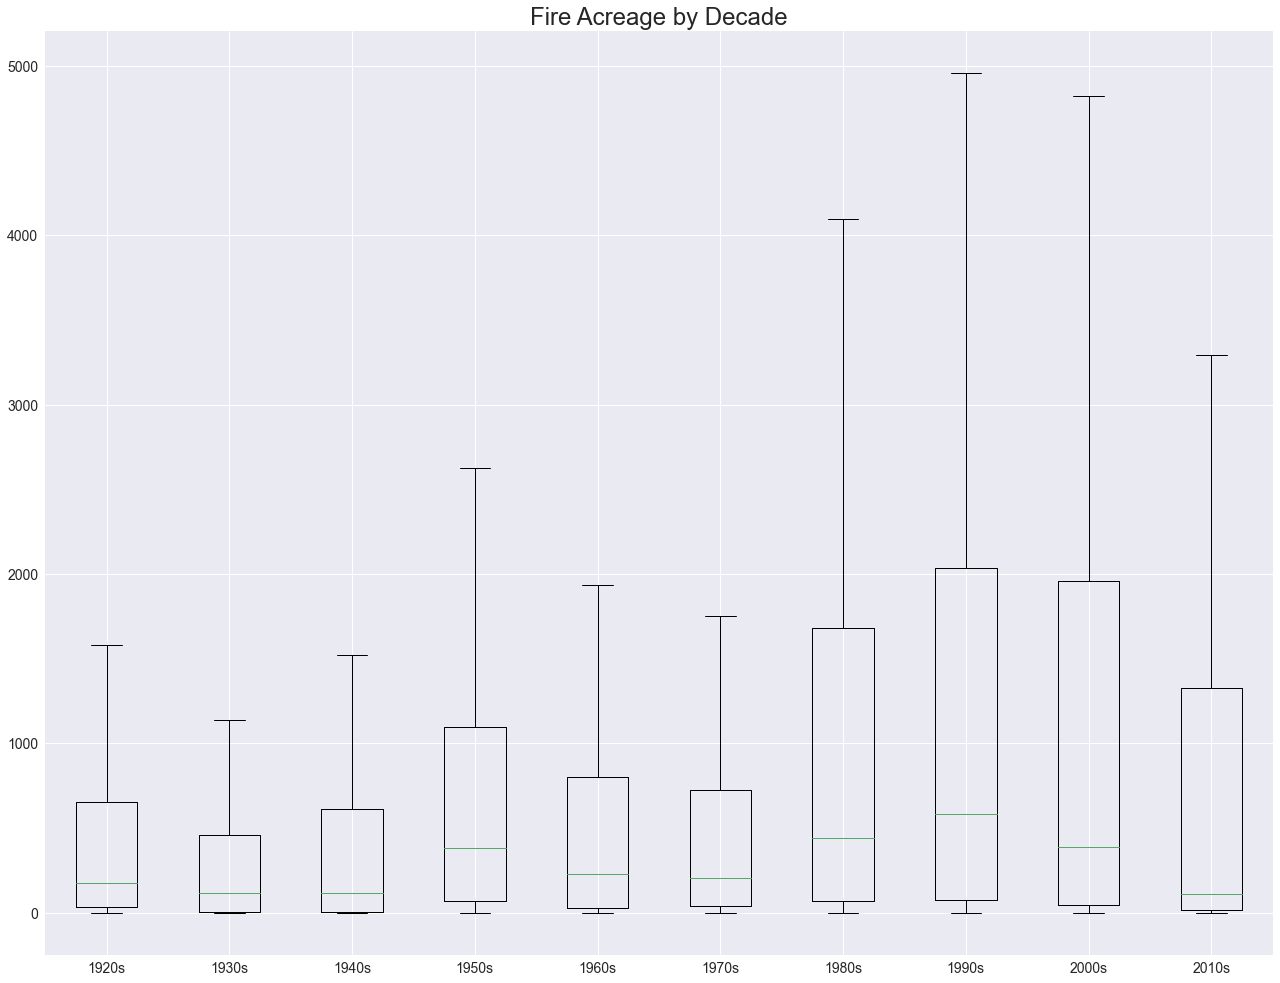

In [28]:
# These boxplots are a great way to visualize average fire size including outliers. Simply plotting average fire size
# as seen above will show a distorted view as averages can be heavily skewed by outliers. The boxplots below show 
# outliers in a way that allows us to see their impact on the average.

# all data to be plotted
data = [acres20s, acres30s, acres40s, acres50s, acres60s, acres70s, acres80s, acres90s, acres2k, acres2k10]

# create labels 
labels = ['1920s', '1930s', '1940s', '1950s', '1960s', '1970s', '1980s', '1990s', '2000s', '2010s']
yLabels = list(range(-1000,6000,1000))

fig, ax = plt.subplots(figsize=(22, 17))
ax.set_title('Fire Acreage by Decade', fontsize=24)
ax.boxplot(data, showfliers=False);
# ax.set_yticklabels(labels)
# ax.xaxis.grid(True)
ax.set_xticklabels(labels, fontsize=14)
ax.set_yticklabels(yLabels, fontsize=14)
ax.yaxis.grid(True);

## Data Subset for Fire Decades

Investigate the fire decades created above, and create GeoJSONs for web mapping

In [29]:
# create a GeoJSON of the cleaned data

fires20s.to_file('../data/fires20s.geojson', driver="GeoJSON")

In [30]:
# create a GeoJSON of the cleaned data

fires30s.to_file('../data/fires30s.geojson', driver="GeoJSON")

In [31]:
# create a GeoJSON of the cleaned data

fires40s.to_file('../data/fires40s.geojson', driver="GeoJSON")

In [32]:
# create a GeoJSON of the cleaned data

fires50s.to_file('../data/fires50s.geojson', driver="GeoJSON")

In [33]:
# create a GeoJSON of the cleaned data

fires60s.to_file('../data/fires60s.geojson', driver="GeoJSON")

In [34]:
# create a GeoJSON of the cleaned data

fires70s.to_file('../data/fires70s.geojson', driver="GeoJSON")

In [35]:
# create a GeoJSON of the cleaned data

fires80s.to_file('../data/fires80s.geojson', driver="GeoJSON")

In [36]:
# create a GeoJSON of the cleaned data

fires90s.to_file('../data/fires90s.geojson', driver="GeoJSON")

In [37]:
# create a GeoJSON of the cleaned data

fires2k.to_file('../data/fires2k.geojson', driver="GeoJSON")

In [38]:
# create a GeoJSON of the cleaned data

fires2k10.to_file('../data/fires2k10.geojson', driver="GeoJSON")

In [91]:
# Load all files back into notebook for further investigation

fire20 = gpd.read_file('../data/fires20s.geojson')
fire30 = gpd.read_file('../data/fires30s.geojson')
fire40 = gpd.read_file('../data/fires40s.geojson')
fire50 = gpd.read_file('../data/fires50s.geojson')
fire60 = gpd.read_file('../data/fires60s.geojson')
fire70 = gpd.read_file('../data/fires70s.geojson')
fire80 = gpd.read_file('../data/fires80s.geojson')
fire90 = gpd.read_file('../data/fires90s.geojson')
fire2k = gpd.read_file('../data/fires2k.geojson')
fire2k10 = gpd.read_file('../data/fires2k10.geojson')

In [92]:
# Investigate the 1920s subset

fire20.Acres.describe()

count      2581.000000
mean       1702.107866
std        6862.003578
min           0.131027
25%          33.224243
50%         176.401739
75%         653.024078
max      140382.104115
Name: Acres, dtype: float64

In [56]:
# Largest fire of the 1920s

fire20Max = fire20.loc[fire20['Acres'] == 140382.104115]

fire20Max

,FireName,FireYear,IgntDate,ContrlDate,ContnDate,Acres,Hectares,FireCause,geometry
677,No Fire Name Provided,1922,None,None,None,140382.104115,56810.672186,9 - Miscellaneous,"MULTIPOLYGON (((-120.09058 35.07691, -120.0865..."


In [57]:
# Create a GeoJSON of the largest fire

fire20Max.to_file('../data/fire20Max.geojson', driver="GeoJSON")

In [58]:
# Investigate the 1930s subset

fire30.Acres.describe()

count      2155.000000
mean       1225.320366
std        7834.125122
min           0.131030
25%           6.870849
50%         116.482781
75%         458.988592
max      235467.743213
Name: Acres, dtype: float64

In [95]:
# Largest fire of the 1930s

fire30Max = fire30.loc[fire30['Acres'] == 235467.743213]

fire30Max

,FireName,FireYear,IgntDate,ContrlDate,ContnDate,Acres,Hectares,FireCause,geometry
822,No Fire Name Provided,1934,None,None,None,235467.743213,95290.49913,No cause indicated,"MULTIPOLYGON (((-114.99367 46.19197, -114.9937..."


In [96]:
# Create a GeoJSON of the largest fire

fire30Max.to_file('../data/fire30Max.geojson', driver="GeoJSON")

In [97]:
# Investigate the 1940s subset

fire40.Acres.describe()

count      2097.000000
mean       1308.709586
std        5706.788885
min           0.090974
25%           4.973563
50%         116.538048
75%         613.253478
max      174730.182860
Name: Acres, dtype: float64

In [98]:
# Largest fire of the 19240s

fire40Max = fire40.loc[fire40['Acres'] == 174730.182860]

fire40Max

,FireName,FireYear,IgntDate,ContrlDate,ContnDate,Acres,Hectares,FireCause,geometry
460,No Fire Name Provided,1941,None,None,None,174730.18286,70710.858781,Unknown,"POLYGON ((-113.00853 43.22066, -113.04383 43.1..."


In [66]:
# Create a GeoJSON of the largest fire

fire40Max.to_file('../data/fire40Max.geojson', driver="GeoJSON")

In [99]:
# Investigate the 1950s subset

fire50.Acres.describe()

count     2376.000000
mean      1720.966529
std       5318.792483
min          0.048469
25%         71.090968
50%        379.830085
75%       1099.092997
max      79428.637178
Name: Acres, dtype: float64

In [102]:
# Largest fire of the 1950s

fire50Max = fire50.loc[fire50['Acres'] >= 79428]

fire50Max

,FireName,FireYear,IgntDate,ContrlDate,ContnDate,Acres,Hectares,FireCause,geometry
1272,REFUGIO,1955,None,1955-09-06,None,79428.637178,32143.657465,9 - Miscellaneous,"POLYGON ((-120.09196 34.58356, -120.08776 34.5..."


In [103]:
# Create a GeoJSON of the largest fire

fire50Max.to_file('../data/fire50Max.geojson', driver="GeoJSON")

In [82]:
# Investigate 1960s subset

fire60.Acres.describe()

count     2445.000000
mean      1608.956463
std       5749.602450
min          0.131032
25%         30.012926
50%        228.848938
75%        799.302114
max      99958.247881
Name: Acres, dtype: float64

In [104]:
# Largest fire of the 1960s

fire60Max = fire60.loc[fire60['Acres'] >= 99958]

fire60Max

,FireName,FireYear,IgntDate,ContrlDate,ContnDate,Acres,Hectares,FireCause,geometry
1668,WELLMAN,1966,None,1966-07-18,None,99958.247881,40451.703502,9 - Miscellaneous,"MULTIPOLYGON (((-119.92550 34.72393, -119.9270..."


In [105]:
# Create a GeoJSON of the largest fire

fire60Max.to_file('../data/fire60Max.geojson', driver="GeoJSON")

In [106]:
# Investigate the 1970s subset

fire70.Acres.describe()

count      3006.000000
mean       1589.392303
std        8073.124040
min           0.210660
25%          40.214388
50%         204.173531
75%         726.606940
max      174201.483293
Name: Acres, dtype: float64

In [111]:
# Largest fire of the 1970s

fire70Max = fire70.loc[fire70['Acres'] >= 174201.483293]

fire70Max

,FireName,FireYear,IgntDate,ContrlDate,ContnDate,Acres,Hectares,FireCause,geometry
93,LAGUNA,1970,None,1970-09-26,1970-09-26,174201.483293,70496.901468,4 - Campfire,"MULTIPOLYGON (((-116.44428 32.75224, -116.4441..."


In [109]:
# Create a GeoJSON of the largest fire

fire70Max.to_file('../data/fire70Max.geojson', driver="GeoJSON")

In [110]:
# Investigate the 1980s subset

fire80.Acres.describe()

count      6987.000000
mean       2870.747392
std       14628.757288
min           0.009995
25%          68.185231
50%         440.531093
75%        1681.056758
max      565988.954367
Name: Acres, dtype: float64

In [112]:
# Largest fire of the 1980s

fire80Max = fire80.loc[fire80['Acres'] >= 565988.954367]

fire80Max

,FireName,FireYear,IgntDate,ContrlDate,ContnDate,Acres,Hectares,FireCause,geometry
1625,LAKE CREEK,1988,1988-07-11,None,None,565988.954367,229047.805987,No cause indicated,"MULTIPOLYGON (((-110.68556 44.14636, -110.6849..."


In [113]:
# Create a GeoJSON of the largest fire

fire80Max.to_file('../data/fire80Max.geojson', driver="GeoJSON")

In [114]:
# Investigate the 1990s subset

fire90.Acres.describe()

count      8279.000000
mean       3208.107695
std       12848.850445
min           0.001410
25%          75.616267
50%         580.972511
75%        2033.761018
max      438771.341140
Name: Acres, dtype: float64

In [115]:
# Largest fire of the 1990s

fire90Max = fire90.loc[fire90['Acres'] >= 438771.341140]

fire90Max

,FireName,FireYear,IgntDate,ContrlDate,ContnDate,Acres,Hectares,FireCause,geometry
69,FYU NE 85,1990,1990-06-29,None,None,438771.34114,177564.618961,No cause indicated,"POLYGON ((-142.53813 67.69802, -142.53753 67.6..."


In [116]:
# Create a GeoJSON of the largest fire

fire90Max.to_file('../data/fire90Max.geojson', driver="GeoJSON")

In [133]:
# Investigate the 2000s subset

fire2k.Acres.describe()

count    1.378900e+04
mean     4.870523e+03
std      2.885924e+04
min      1.424704e-05
25%      4.557914e+01
50%      3.908160e+02
75%      1.957979e+03
max      1.183538e+06
Name: Acres, dtype: float64

In [124]:
# Largest fire of the 2000s

fire2kMax = fire2k.loc[fire2k['Acres'] >= 1183538.00855]

fire2kMax

,FireName,FireYear,IgntDate,ContrlDate,ContnDate,Acres,Hectares,FireCause,geometry
3751,UNNAMED,2006,2006-04-22,None,None,1.183538e+06,478961.262528,No cause indicated,"MULTIPOLYGON (((-96.74126 36.60992, -96.74037 ..."


In [125]:
# Create a GeoJSON of the largest fire

fire2kMax.to_file('../data/fire2kMax.geojson', driver="GeoJSON")

In [126]:
# Investigate the 2010s subset

fire2k10.Acres.describe()

count     19029.000000
mean       3627.208231
std       19414.158293
min           0.000008
25%          14.689809
50%         111.331836
75%        1327.829634
max      677032.736045
Name: Acres, dtype: float64

In [128]:
# Largest fire of the 2010s

fire2k10Max = fire2k10.loc[fire2k10['Acres'] >= 677032.736045]

fire2k10Max

,FireName,FireYear,IgntDate,ContrlDate,ContnDate,Acres,Hectares,FireCause,geometry
16681,Martin,2018,2018-07-05,2018-07-25,None,677032.736045,273985.669819,Human,"MULTIPOLYGON (((-116.16111 41.86060, -116.1610..."


In [129]:
# Create a GeoJSON of the largest fire

fire2k10Max.to_file('../data/fire2k10Max.geojson', driver="GeoJSON")

## Data Subset for Megafires

create a subset for wildfires with a size of 100,000 acres or more

In [158]:
# Megafires

megaFires = centFireClean.loc[centFireClean['Acres'] >= 100000]

megaFires

,FireName,FireYear,IgntDate,ContrlDate,ContnDate,Acres,Hectares,FireCause,geometry
53,HANFORD,1984,1984-08-12,None,None,122914.021679,49741.583777,No cause indicated,"POLYGON ((-119.87261 46.49947, -119.87178 46.4..."
54,HAWK CREEK,1984,1984-08-25,None,None,157777.402626,63850.305959,No cause indicated,"POLYGON ((-108.22094 46.40656, -108.22029 46.4..."
200,ALLAN ROAD,1985,1985-04-07,None,None,110696.123131,44797.171285,No cause indicated,"MULTIPOLYGON (((-76.13993 35.69599, -76.13984 ..."
683,WHEELER #2,1985,1985-07-01,None,None,173560.982186,70237.699637,No cause indicated,"POLYGON ((-119.42305 34.62819, -119.42098 34.6..."
710,BISSELL CK,1986,1986-08-10,None,None,103497.567031,41884.016412,No cause indicated,"POLYGON ((-116.48576 44.23200, -116.48510 44.2..."
...,...,...,...,...,...,...,...,...,...
61811,North River,2019,2019-06-10,2019-08-20,None,111925.832989,45294.817649,Natural,"POLYGON ((-160.52926 65.36291, -160.52924 65.3..."
62056,Sheep,2019,2019-07-22,2019-07-27,None,112182.174395,45398.555427,Natural,"POLYGON ((-112.60531 43.72405, -112.60515 43.7..."
62156,Swan Lake,2019,None,None,None,167178.734557,67654.893373,No cause indicated,"POLYGON ((-150.08337 60.49472, -150.08337 60.4..."
62327,Woodbury,2019,2019-06-08,None,None,123972.828367,50170.068021,No cause indicated,"POLYGON ((-111.14387 33.67310, -111.14374 33.6..."


In [159]:
# Create a GeoJSON of megafires

megaFires.to_file('../data/megaFires.geojson', driver="GeoJSON")

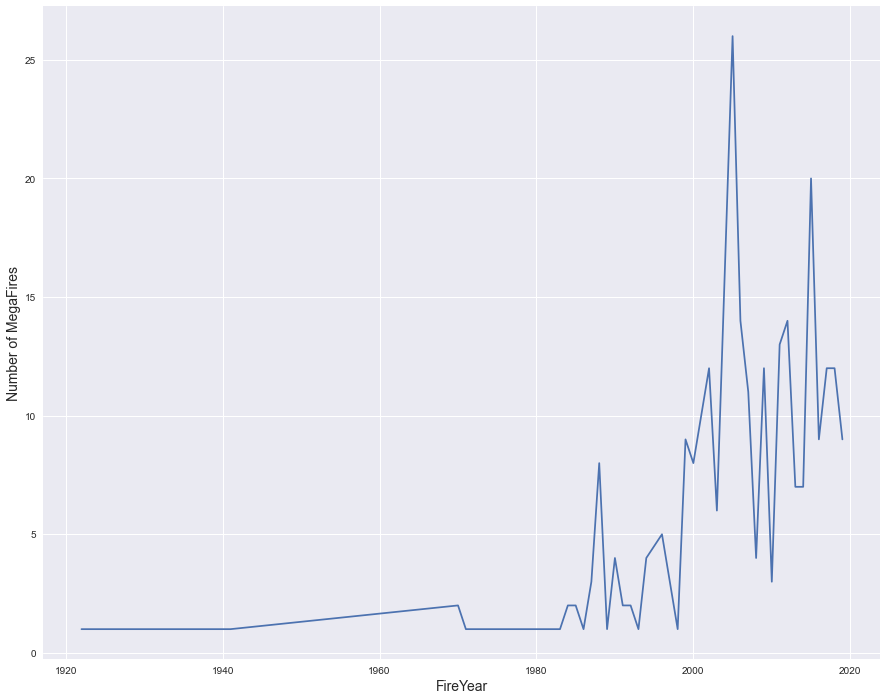

In [181]:
# create a figure and increase the size 
fig, ax = plt.subplots(figsize=(15, 12))

plt.ylabel('Number of MegaFires', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

megaFires.groupby('FireYear').FireYear.count().plot();

In [194]:
mega20 = fires20s.loc[fires20s['Acres'] >= 100000]

mega20

,FireName,FireYear,IgntDate,ContrlDate,ContnDate,Acres,Hectares,FireCause,geometry
17006,No Fire Name Provided,1922,None,None,None,140382.104115,56810.672186,9 - Miscellaneous,"MULTIPOLYGON (((-120.09058 35.07691, -120.0865..."


In [193]:
mega30 = fires30s.loc[fires30s['Acres'] >= 100000]

mega30

,FireName,FireYear,IgntDate,ContrlDate,ContnDate,Acres,Hectares,FireCause,geometry
19407,MATILIJA,1932,None,1932-09-07,None,219999.089336,89030.551467,9 - Miscellaneous,"POLYGON ((-119.30482 34.63155, -119.30417 34.6..."
19732,No Fire Name Provided,1934,None,None,None,235467.743213,95290.499130,No cause indicated,"MULTIPOLYGON (((-114.99367 46.19197, -114.9937..."


In [195]:
mega40 = fires40s.loc[fires40s['Acres'] >= 100000]

mega40

,FireName,FireYear,IgntDate,ContrlDate,ContnDate,Acres,Hectares,FireCause,geometry
21525,No Fire Name Provided,1941,None,None,None,174730.18286,70710.858781,Unknown,"POLYGON ((-113.00853 43.22066, -113.04383 43.1..."


In [198]:
mega50 = fires50s.loc[fires50s['Acres'] >= 100000]

mega50

,FireName,FireYear,IgntDate,ContrlDate,ContnDate,Acres,Hectares,FireCause,geometry


In [200]:
mega60 = fires60s.loc[fires60s['Acres'] >= 100000]

mega60

,FireName,FireYear,IgntDate,ContrlDate,ContnDate,Acres,Hectares,FireCause,geometry


In [201]:
mega70 = fires70s.loc[fires70s['Acres'] >= 100000]

mega70

,FireName,FireYear,IgntDate,ContrlDate,ContnDate,Acres,Hectares,FireCause,geometry
27943,LAGUNA,1970,None,1970-09-26,1970-09-26,174201.483293,70496.901468,4 - Campfire,"MULTIPOLYGON (((-116.44428 32.75224, -116.4441..."
27953,MAYO FIRE,1970,None,1970-05-15,None,151146.847169,61167.012994,14 - Unknown / Unidentified,"MULTIPOLYGON (((-118.65316 34.15126, -118.6529..."
28231,In Between,1971,1971-08-08,None,None,102403.363363,41441.207506,Unknown,"MULTIPOLYGON (((-114.02717 42.88340, -114.0250..."
29599,BROWNS CREEK,1976,None,None,1976-07-04,150165.011602,60769.677885,Unknown,"POLYGON ((-115.53042 42.82368, -115.52980 42.8..."
29915,MARBLE-CONE,1977,None,1977-08-01,None,173333.306548,70145.562494,9 - Miscellaneous,"POLYGON ((-121.64715 36.37206, -121.64513 36.3..."


In [202]:
mega80 = fires80s.loc[fires80s['Acres'] >= 100000]

mega80

,FireName,FireYear,IgntDate,ContrlDate,ContnDate,Acres,Hectares,FireCause,geometry
53,HANFORD,1984,1984-08-12,None,None,122914.021679,49741.583777,No cause indicated,"POLYGON ((-119.87261 46.49947, -119.87178 46.4..."
54,HAWK CREEK,1984,1984-08-25,None,None,157777.402626,63850.305959,No cause indicated,"POLYGON ((-108.22094 46.40656, -108.22029 46.4..."
200,ALLAN ROAD,1985,1985-04-07,None,None,110696.123131,44797.171285,No cause indicated,"MULTIPOLYGON (((-76.13993 35.69599, -76.13984 ..."
683,WHEELER #2,1985,1985-07-01,None,None,173560.982186,70237.699637,No cause indicated,"POLYGON ((-119.42305 34.62819, -119.42098 34.6..."
710,BISSELL CK,1986,1986-08-10,None,None,103497.567031,41884.016412,No cause indicated,"POLYGON ((-116.48576 44.23200, -116.48510 44.2..."
1163,KING TITUS,1987,1987-08-30,None,None,100787.042361,40787.105025,No cause indicated,"POLYGON ((-123.24015 41.79581, -123.24015 41.7..."
1217,PAPER,1987,1987-08-31,None,None,137836.969448,55780.691818,No cause indicated,"POLYGON ((-120.15619 37.99699, -120.15520 37.9..."
1366,UNNAMED,1987,1987-04-05,None,None,131859.358677,53361.636426,No cause indicated,"POLYGON ((-95.43741 48.25298, -95.43673 48.252..."
1501,832604,1988,1988-06-29,None,None,298258.595308,120701.077901,No cause indicated,"POLYGON ((-146.06333 66.09019, -146.05815 66.0..."
1517,BIG COUNTRY FIRE,1988,1988-03-12,None,None,209377.287012,84732.056772,No cause indicated,"POLYGON ((-99.41488 32.99116, -99.41433 32.991..."


In [203]:
mega90 = fires90s.loc[fires90s['Acres'] >= 100000]

mega90

,FireName,FireYear,IgntDate,ContrlDate,ContnDate,Acres,Hectares,FireCause,geometry
2213,032018,1990,1990-06-27,None,None,333570.712700,134991.397440,No cause indicated,"POLYGON ((-148.32038 66.78533, -148.31780 66.7..."
2218,032042,1990,1990-07-02,None,None,123333.782420,49911.455072,No cause indicated,"POLYGON ((-144.81498 65.93318, -144.81391 65.9..."
2240,CAMPBELL,1990,1990-08-06,None,None,128265.663455,51907.318281,No cause indicated,"POLYGON ((-121.85119 40.15084, -121.84873 40.1..."
2278,FYU NE 85,1990,1990-06-29,None,None,438771.341140,177564.618961,No cause indicated,"POLYGON ((-142.53813 67.69802, -142.53753 67.6..."
2442,131569,1991,1991-06-30,None,None,109432.642018,44285.858168,No cause indicated,"POLYGON ((-152.22114 66.86066, -152.22148 66.8..."
2469,BLAINE C,1991,1991-10-16,None,None,138191.675526,55924.236402,No cause indicated,"POLYGON ((-109.22901 48.52562, -109.22811 48.5..."
2802,BLACK RIDGE,1992,1992-08-02,None,None,147832.647013,59825.802589,No cause indicated,"POLYGON ((-113.80094 43.24862, -113.79834 43.2..."
2842,FOOTHILLS,1992,1992-08-19,None,None,232986.773195,94286.485297,No cause indicated,"MULTIPOLYGON (((-115.88285 43.40526, -115.8827..."
3093,332557,1993,1993-07-14,None,None,214280.089300,86716.152218,No cause indicated,"POLYGON ((-143.72841 65.99361, -143.72403 65.9..."
3396,CORRAL CREEK-BLACKWELL COMPLEX,1994,1994-08-02,None,None,140100.469739,56696.698697,No cause indicated,"POLYGON ((-116.07157 45.38561, -116.07072 45.3..."


In [205]:
mega2k = fires2k.loc[fires2k['Acres'] >= 100000]

mega2k

,FireName,FireYear,IgntDate,ContrlDate,ContnDate,Acres,Hectares,FireCause,geometry
5858,24 COMMAND-TWO FORK,2000,2000-06-07,None,None,162313.248498,65685.899281,No cause indicated,"POLYGON ((-119.78833 46.57409, -119.78765 46.5..."
5891,BERING CREEK,2000,2000-06-14,None,None,136741.197819,55337.248381,No cause indicated,"POLYGON ((-153.53049 65.06882, -153.52896 65.0..."
5964,CLEAR CREEK DIVIDE COMPLEX (CLEAR CREEK),2000,2000-07-10,None,None,170321.657979,68926.790481,No cause indicated,"POLYGON ((-114.29986 45.36222, -114.29946 45.3..."
6000,DIAMOND COMPLEX (DIAMOND PEAK),2000,2000-07-31,None,None,271360.876128,109815.947517,No cause indicated,"POLYGON ((-115.20626 45.24245, -115.20615 45.2..."
6108,KATESBASIN,2000,2000-08-07,None,None,141127.630818,57112.376405,No cause indicated,"POLYGON ((-108.64557 43.70017, -108.64479 43.7..."
...,...,...,...,...,...,...,...,...,...
11310,TONCLONUKNA CREEK,2009,2009-05-23,None,None,159039.672109,64361.128747,No cause indicated,"MULTIPOLYGON (((-153.77865 63.41292, -153.7784..."
11331,UNNAMED,2009,2009-04-10,None,None,800723.059161,324041.411920,No cause indicated,"MULTIPOLYGON (((-96.10078 35.26894, -96.10077 ..."
11332,UNNAMED,2009,2009-04-20,None,None,765548.740958,309806.857783,No cause indicated,"MULTIPOLYGON (((-96.70573 36.63568, -96.70573 ..."
11372,WOOD RIVER 1,2009,2009-07-12,None,None,120132.785234,48616.056325,No cause indicated,"POLYGON ((-148.16476 64.50947, -148.16252 64.5..."


In [206]:
mega2k10 = fires2k10.loc[fires2k10['Acres'] >= 100000]

mega2k10

,FireName,FireYear,IgntDate,ContrlDate,ContnDate,Acres,Hectares,FireCause,geometry
11514,JEFFERSON,2010,2010-07-13,None,None,108542.024330,43925.437658,No cause indicated,"POLYGON ((-112.19224 43.82447, -112.19190 43.8..."
11535,LONG BUTTE,2010,2010-08-21,None,None,321778.226158,130219.143231,No cause indicated,"MULTIPOLYGON (((-114.94473 42.44875, -114.9451..."
11641,TOKLAT 2,2010,2010-06-04,None,None,146446.855453,59264.992146,No cause indicated,"MULTIPOLYGON (((-150.37832 64.50240, -150.3779..."
11838,COOPERMOUNTAINRANCH,2011,2011-04-11,None,None,157855.145548,63881.767431,No cause indicated,"MULTIPOLYGON (((-100.55020 32.88180, -100.5496..."
11872,DEATONCOLE,2011,2011-04-25,None,None,195535.695010,79130.558271,No cause indicated,"POLYGON ((-101.38344 30.49536, -101.38262 30.4..."
...,...,...,...,...,...,...,...,...,...
61772,Mt Hurst,2019,None,None,None,308934.528338,125021.478535,No cause indicated,"POLYGON ((-157.70023 63.40249, -157.69991 63.4..."
61811,North River,2019,2019-06-10,2019-08-20,None,111925.832989,45294.817649,Natural,"POLYGON ((-160.52926 65.36291, -160.52924 65.3..."
62056,Sheep,2019,2019-07-22,2019-07-27,None,112182.174395,45398.555427,Natural,"POLYGON ((-112.60531 43.72405, -112.60515 43.7..."
62156,Swan Lake,2019,None,None,None,167178.734557,67654.893373,No cause indicated,"POLYGON ((-150.08337 60.49472, -150.08337 60.4..."


In [207]:
# Create a GeoJSON of each decade's megafire(s), skip 1950s and 1960s since they don't have megafires

mega20.to_file('../data/mega20.geojson', driver="GeoJSON")

mega30.to_file('../data/mega30.geojson', driver="GeoJSON")

mega40.to_file('../data/mega40.geojson', driver="GeoJSON")

mega70.to_file('../data/mega50.geojson', driver="GeoJSON")

mega80.to_file('../data/mega60.geojson', driver="GeoJSON")

mega90.to_file('../data/mega90.geojson', driver="GeoJSON")

mega2k.to_file('../data/mega2k.geojson', driver="GeoJSON") 

mega2k10.to_file('../data/mega2k10.geojson', driver="GeoJSON")

## Data Subset with Ignition and Control Dates

Create a subset of the centFire data which has both Ignition and Control dates

In [21]:
# See how many non-null values for each column

centFire.notnull().sum()

FireName      62744
FireYear      62744
IgntDate      34077
ContrlDate    22878
ContnDate      7196
Acres         62744
Hectares      62744
FireCause     62744
FireQual      62744
Shape_Leng    62744
Shape_Area    62744
geometry      62744
dtype: int64

In [26]:
# Create a subset for records with Ignition and Control Dates

bothDates = centFire[(centFire.IgntDate.notnull()) & (centFire.ContrlDate.notnull())]

bothDates

,FireName,FireYear,IgntDate,ContrlDate,ContnDate,Acres,Hectares,FireCause,FireQual,Shape_Leng,Shape_Area,geometry
3111,BULLDOG,1993,1993-08-01,1993-08-04,None,1151.845182,466.135619,Unknown,1,14868.036527,4.661356e+06,"POLYGON ((-113.86058 37.02242, -113.85956 37.0..."
3176,MILL CREEK,1993,1993-06-21,1993-06-23,None,3456.959077,1398.982941,Natural,1,23951.896471,1.398983e+07,"POLYGON ((-113.53524 37.22023, -113.53478 37.2..."
3317,WHITE ROCK,1993,1993-07-15,1993-07-19,None,3104.880685,1256.501745,Human,1,22563.222161,1.256502e+07,"POLYGON ((-114.02168 38.18800, -114.02107 38.1..."
3372,BULLOCH,1994,1994-07-22,1994-07-25,None,1702.961502,689.164679,Natural,1,16963.187545,6.891647e+06,"POLYGON ((-112.89457 37.40672, -112.89397 37.4..."
3382,CAVE CANYON,1994,1994-07-27,1994-08-15,None,1197.874480,484.763032,Natural,1,13209.277725,4.847630e+06,"POLYGON ((-112.88627 38.32879, -112.88582 38.3..."
...,...,...,...,...,...,...,...,...,...,...,...,...
62332,Workhorse,2019,2019-07-06,2019-07-07,None,154.294363,62.440769,Natural,2,6635.436744,6.244077e+05,"POLYGON ((-116.75791 40.88787, -116.75793 40.8..."
62333,Worm Lake,2019,2019-07-20,2019-10-15,None,27.173260,10.996638,Natural,2,1959.268784,1.099664e+05,"POLYGON ((-152.59138 64.79264, -152.59136 64.7..."
62334,Wylies,2019,2019-08-05,2019-08-05,None,0.087160,0.035272,Unknown,2,69.927927,3.527239e+02,"POLYGON ((-114.92200 46.00751, -114.92204 46.0..."
62335,Yale,2019,2019-08-20,2019-08-20,None,3.426372,1.386605,Unknown,2,643.951177,1.386605e+04,"POLYGON ((-113.44581 42.74512, -113.44581 42.7..."


In [23]:
# 62,744 entries in the centFire df, only 10,948 when filtered for records with both Ignition and Control Dates

bothDates.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 10948 entries, 3111 to 62338
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   FireName    10948 non-null  object  
 1   FireYear    10948 non-null  int64   
 2   IgntDate    10948 non-null  object  
 3   ContrlDate  10948 non-null  object  
 4   ContnDate   789 non-null    object  
 5   Acres       10948 non-null  float64 
 6   Hectares    10948 non-null  float64 
 7   FireCause   10948 non-null  object  
 8   FireQual    10948 non-null  int64   
 9   Shape_Leng  10948 non-null  float64 
 10  Shape_Area  10948 non-null  float64 
 11  geometry    10948 non-null  geometry
dtypes: float64(4), geometry(1), int64(2), object(5)
memory usage: 1.1+ MB


In [47]:
# Create a CSV of the subset

bothDates.to_csv('../data/bothDates.csv', index=False)

In [ ]:
bothDates.to_file('../rawData/bothIgCtrlDates.geojson', driver="GeoJSON")

In [27]:
# Read the new dataset

hasBoth = gpd.read_file('../rawData/bothIgCtrlDates.geojson')

In [28]:
hasBoth

,FireName,FireYear,IgntDate,ContrlDate,ContnDate,Acres,Hectares,FireCause,FireQual,Shape_Leng,Shape_Area,geometry
0,BULLDOG,1993,1993-08-01,1993-08-04,None,1151.845182,466.135619,Unknown,1,14868.036527,4.661356e+06,"POLYGON ((-113.86058 37.02242, -113.85956 37.0..."
1,MILL CREEK,1993,1993-06-21,1993-06-23,None,3456.959077,1398.982941,Natural,1,23951.896471,1.398983e+07,"POLYGON ((-113.53524 37.22023, -113.53478 37.2..."
2,WHITE ROCK,1993,1993-07-15,1993-07-19,None,3104.880685,1256.501745,Human,1,22563.222161,1.256502e+07,"POLYGON ((-114.02168 38.18800, -114.02107 38.1..."
3,BULLOCH,1994,1994-07-22,1994-07-25,None,1702.961502,689.164679,Natural,1,16963.187545,6.891647e+06,"POLYGON ((-112.89457 37.40672, -112.89397 37.4..."
4,CAVE CANYON,1994,1994-07-27,1994-08-15,None,1197.874480,484.763032,Natural,1,13209.277725,4.847630e+06,"POLYGON ((-112.88627 38.32879, -112.88582 38.3..."
...,...,...,...,...,...,...,...,...,...,...,...,...
10943,Workhorse,2019,2019-07-06,2019-07-07,None,154.294363,62.440769,Natural,2,6635.436744,6.244077e+05,"POLYGON ((-116.75791 40.88787, -116.75793 40.8..."
10944,Worm Lake,2019,2019-07-20,2019-10-15,None,27.173260,10.996638,Natural,2,1959.268784,1.099664e+05,"POLYGON ((-152.59138 64.79264, -152.59136 64.7..."
10945,Wylies,2019,2019-08-05,2019-08-05,None,0.087160,0.035272,Unknown,2,69.927927,3.527239e+02,"POLYGON ((-114.92200 46.00751, -114.92204 46.0..."
10946,Yale,2019,2019-08-20,2019-08-20,None,3.426372,1.386605,Unknown,2,643.951177,1.386605e+04,"POLYGON ((-113.44581 42.74512, -113.44581 42.7..."


In [26]:
hasBoth.isnull().sum()

FireName          0
FireYear          0
IgntDate          0
ContrlDate        0
ContnDate     10159
Acres             0
Hectares          0
FireCause         0
FireQual          0
Shape_Leng        0
Shape_Area        0
geometry          0
dtype: int64

In [27]:
hasBoth['IgntDate'] = pd.to_datetime(hasBoth.IgntDate)

hasBoth['ContrlDate'] = pd.to_datetime(hasBoth.ContrlDate)

In [28]:
hasBoth.dtypes

FireName              object
FireYear               int64
IgntDate      datetime64[ns]
ContrlDate    datetime64[ns]
ContnDate             object
Acres                float64
Hectares             float64
FireCause             object
FireQual               int64
Shape_Leng           float64
Shape_Area           float64
geometry            geometry
dtype: object

In [29]:
# Create a new column for the month of ignition for each fire

hasBoth['IgntMonth'] = hasBoth.IgntDate.dt.month_name()

In [30]:
# Create a new column for the month of control for each fire

hasBoth['ContrlMonth'] = hasBoth.ContrlDate.dt.month_name()

In [31]:
hasBoth

,FireName,FireYear,IgntDate,ContrlDate,ContnDate,Acres,Hectares,FireCause,FireQual,Shape_Leng,Shape_Area,geometry,IgntMonth,ContrlMonth
0,BULLDOG,1993,1993-08-01,1993-08-04,None,1151.845182,466.135619,Unknown,1,14868.036527,4.661356e+06,"POLYGON ((-113.86058 37.02242, -113.85956 37.0...",August,August
1,MILL CREEK,1993,1993-06-21,1993-06-23,None,3456.959077,1398.982941,Natural,1,23951.896471,1.398983e+07,"POLYGON ((-113.53524 37.22023, -113.53478 37.2...",June,June
2,WHITE ROCK,1993,1993-07-15,1993-07-19,None,3104.880685,1256.501745,Human,1,22563.222161,1.256502e+07,"POLYGON ((-114.02168 38.18800, -114.02107 38.1...",July,July
3,BULLOCH,1994,1994-07-22,1994-07-25,None,1702.961502,689.164679,Natural,1,16963.187545,6.891647e+06,"POLYGON ((-112.89457 37.40672, -112.89397 37.4...",July,July
4,CAVE CANYON,1994,1994-07-27,1994-08-15,None,1197.874480,484.763032,Natural,1,13209.277725,4.847630e+06,"POLYGON ((-112.88627 38.32879, -112.88582 38.3...",July,August
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10943,Workhorse,2019,2019-07-06,2019-07-07,None,154.294363,62.440769,Natural,2,6635.436744,6.244077e+05,"POLYGON ((-116.75791 40.88787, -116.75793 40.8...",July,July
10944,Worm Lake,2019,2019-07-20,2019-10-15,None,27.173260,10.996638,Natural,2,1959.268784,1.099664e+05,"POLYGON ((-152.59138 64.79264, -152.59136 64.7...",July,October
10945,Wylies,2019,2019-08-05,2019-08-05,None,0.087160,0.035272,Unknown,2,69.927927,3.527239e+02,"POLYGON ((-114.92200 46.00751, -114.92204 46.0...",August,August
10946,Yale,2019,2019-08-20,2019-08-20,None,3.426372,1.386605,Unknown,2,643.951177,1.386605e+04,"POLYGON ((-113.44581 42.74512, -113.44581 42.7...",August,August


In [33]:
# Create columns for numeric value of month

hasBoth['IgntMonthNum'] = hasBoth.IgntDate.dt.month

hasBoth['ContrlMonthNum'] = hasBoth.ContrlDate.dt.month

In [34]:
# Verify new columns

hasBoth

,FireName,FireYear,IgntDate,ContrlDate,ContnDate,Acres,Hectares,FireCause,FireQual,Shape_Leng,Shape_Area,geometry,IgntMonth,ContrlMonth,IgntMonthNum,ContrlMonthNum
0,BULLDOG,1993,1993-08-01,1993-08-04,None,1151.845182,466.135619,Unknown,1,14868.036527,4.661356e+06,"POLYGON ((-113.86058 37.02242, -113.85956 37.0...",August,August,8,8
1,MILL CREEK,1993,1993-06-21,1993-06-23,None,3456.959077,1398.982941,Natural,1,23951.896471,1.398983e+07,"POLYGON ((-113.53524 37.22023, -113.53478 37.2...",June,June,6,6
2,WHITE ROCK,1993,1993-07-15,1993-07-19,None,3104.880685,1256.501745,Human,1,22563.222161,1.256502e+07,"POLYGON ((-114.02168 38.18800, -114.02107 38.1...",July,July,7,7
3,BULLOCH,1994,1994-07-22,1994-07-25,None,1702.961502,689.164679,Natural,1,16963.187545,6.891647e+06,"POLYGON ((-112.89457 37.40672, -112.89397 37.4...",July,July,7,7
4,CAVE CANYON,1994,1994-07-27,1994-08-15,None,1197.874480,484.763032,Natural,1,13209.277725,4.847630e+06,"POLYGON ((-112.88627 38.32879, -112.88582 38.3...",July,August,7,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10943,Workhorse,2019,2019-07-06,2019-07-07,None,154.294363,62.440769,Natural,2,6635.436744,6.244077e+05,"POLYGON ((-116.75791 40.88787, -116.75793 40.8...",July,July,7,7
10944,Worm Lake,2019,2019-07-20,2019-10-15,None,27.173260,10.996638,Natural,2,1959.268784,1.099664e+05,"POLYGON ((-152.59138 64.79264, -152.59136 64.7...",July,October,7,10
10945,Wylies,2019,2019-08-05,2019-08-05,None,0.087160,0.035272,Unknown,2,69.927927,3.527239e+02,"POLYGON ((-114.92200 46.00751, -114.92204 46.0...",August,August,8,8
10946,Yale,2019,2019-08-20,2019-08-20,None,3.426372,1.386605,Unknown,2,643.951177,1.386605e+04,"POLYGON ((-113.44581 42.74512, -113.44581 42.7...",August,August,8,8


In [35]:
# Drop unwanted columns

hasBoth.drop(['ContnDate', 'FireQual'], axis=1, inplace=True)

In [36]:
# Verify columns were dropped and data is clean

hasBoth

,FireName,FireYear,IgntDate,ContrlDate,Acres,Hectares,FireCause,Shape_Leng,Shape_Area,geometry,IgntMonth,ContrlMonth,IgntMonthNum,ContrlMonthNum
0,BULLDOG,1993,1993-08-01,1993-08-04,1151.845182,466.135619,Unknown,14868.036527,4.661356e+06,"POLYGON ((-113.86058 37.02242, -113.85956 37.0...",August,August,8,8
1,MILL CREEK,1993,1993-06-21,1993-06-23,3456.959077,1398.982941,Natural,23951.896471,1.398983e+07,"POLYGON ((-113.53524 37.22023, -113.53478 37.2...",June,June,6,6
2,WHITE ROCK,1993,1993-07-15,1993-07-19,3104.880685,1256.501745,Human,22563.222161,1.256502e+07,"POLYGON ((-114.02168 38.18800, -114.02107 38.1...",July,July,7,7
3,BULLOCH,1994,1994-07-22,1994-07-25,1702.961502,689.164679,Natural,16963.187545,6.891647e+06,"POLYGON ((-112.89457 37.40672, -112.89397 37.4...",July,July,7,7
4,CAVE CANYON,1994,1994-07-27,1994-08-15,1197.874480,484.763032,Natural,13209.277725,4.847630e+06,"POLYGON ((-112.88627 38.32879, -112.88582 38.3...",July,August,7,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10943,Workhorse,2019,2019-07-06,2019-07-07,154.294363,62.440769,Natural,6635.436744,6.244077e+05,"POLYGON ((-116.75791 40.88787, -116.75793 40.8...",July,July,7,7
10944,Worm Lake,2019,2019-07-20,2019-10-15,27.173260,10.996638,Natural,1959.268784,1.099664e+05,"POLYGON ((-152.59138 64.79264, -152.59136 64.7...",July,October,7,10
10945,Wylies,2019,2019-08-05,2019-08-05,0.087160,0.035272,Unknown,69.927927,3.527239e+02,"POLYGON ((-114.92200 46.00751, -114.92204 46.0...",August,August,8,8
10946,Yale,2019,2019-08-20,2019-08-20,3.426372,1.386605,Unknown,643.951177,1.386605e+04,"POLYGON ((-113.44581 42.74512, -113.44581 42.7...",August,August,8,8


In [37]:
# Create a GeoJSON for web mapping of the cleaned data subset

hasBoth.to_file('../data/bothDatesClean.geojson', driver="GeoJSON")

## Exploring dataset for mapping insights

Below I explore the hasBoth dataset in preparation for mapping

In [48]:
# Get info about Fire Years

hasBoth.Acres.describe()

count     10948.000000
mean       1066.587819
std       11504.005372
min           0.000014
25%          18.604953
50%          75.609992
75%         291.599081
max      677032.736045
Name: Acres, dtype: float64

In [45]:
hasBoth.isnull().sum()

FireName          0
FireYear          0
IgntDate          0
ContrlDate        0
Acres             0
Hectares          0
FireCause         0
Shape_Leng        0
Shape_Area        0
geometry          0
IgntMonth         0
ContrlMonth       0
IgntMonthNum      0
ContrlMonthNum    0
dtype: int64

In [44]:
# Fire year list

hasBoth.FireYear.sort_values()

211      1976
212      1976
213      1976
214      1977
215      1977
         ... 
10466    2019
10467    2019
10468    2019
10470    2019
10947    2019
Name: FireYear, Length: 10948, dtype: int64

In [33]:
# Let's narrow our data to the 1970s

seventies = hasBoth[hasBoth.FireYear <= 1979]

seventies

,FireName,FireYear,IgntDate,ContrlDate,ContnDate,Acres,Hectares,FireCause,FireQual,Shape_Leng,Shape_Area,geometry
211,Coal Creek 31,1976,1976-01-01,1976-01-01,None,614.952666,248.862734,Unknown,2,7763.495525,2.488627e+06,"POLYGON ((-110.64740 39.71652, -110.64704 39.7..."
212,Dugout Creek,1976,1976-01-01,1976-01-01,None,109.076857,44.141877,Unknown,2,5128.977034,4.414188e+05,"POLYGON ((-110.30414 38.74390, -110.30472 38.7..."
213,Valley Mountain,1976,1976-01-01,1976-01-01,None,551.705538,223.267507,Unknown,2,7829.675224,2.232675e+06,"POLYGON ((-110.11228 39.43416, -110.11154 39.4..."
214,Fisher Mesa,1977,1977-01-01,1977-01-01,None,108.575486,43.938979,Unknown,2,3742.492930,4.393898e+05,"POLYGON ((-109.26695 38.65699, -109.26630 38.6..."
215,Green River,1977,1977-01-01,1977-01-01,None,62.805960,25.416693,Unknown,2,5670.396925,2.541669e+05,"POLYGON ((-110.05443 38.60658, -110.05270 38.6..."
216,Bruin Point,1978,1978-01-01,1978-01-01,None,342.156019,138.465751,Unknown,2,7591.658057,1.384658e+06,"POLYGON ((-110.32702 39.64996, -110.32586 39.6..."
217,Colorado Parkway,1979,1979-01-01,1979-01-01,None,25.254290,10.220058,Unknown,2,2571.471353,1.022006e+05,"POLYGON ((-109.56178 38.60186, -109.56212 38.6..."
218,Middle Canyon,1979,1979-01-01,1979-01-01,None,245.081465,99.181038,Unknown,2,8752.956313,9.918104e+05,"POLYGON ((-109.27627 39.39994, -109.27618 39.3..."


In [41]:
# Largest fire in the 1970s

print(seventies.max())

FireName      Valley Mountain
FireYear                 1979
IgntDate           1979-01-01
ContrlDate         1979-01-01
ContnDate                None
Acres              614.952666
Hectares           248.862734
FireCause             Unknown
FireQual                    2
Shape_Leng        8752.956313
Shape_Area      2488627.34458
dtype: object


In [37]:
# Data subset for 2010 to present

twoKTen = hasBoth[hasBoth.FireYear >= 2010]

twoKTen

,FireName,FireYear,IgntDate,ContrlDate,ContnDate,Acres,Hectares,FireCause,FireQual,Shape_Leng,Shape_Area,geometry
131,AUGUSI,2010,2010-08-26,2010-09-23,None,1290.675046,522.318122,Unknown,1,19887.910491,5.223181e+06,"POLYGON ((-109.06255 39.69503, -109.06202 39.6..."
132,EIGHT MILE,2010,2010-10-01,2010-10-07,None,1621.187474,656.071874,Unknown,1,14271.710764,6.560719e+06,"POLYGON ((-112.97486 40.58248, -112.97433 40.5..."
133,BARN,2011,2011-06-10,2011-06-17,None,1415.242863,572.728973,Unknown,1,13158.099330,5.727290e+06,"POLYGON ((-113.75159 37.19835, -113.75158 37.1..."
134,CHAPARRAL,2011,2011-08-06,2011-08-10,None,1745.943309,706.558814,Human,1,15803.014813,7.065588e+06,"POLYGON ((-111.92247 40.24910, -111.92246 40.2..."
135,COTTONWOOD,2011,2011-06-16,2011-06-19,None,1195.687482,483.877984,Human,1,12543.058481,4.838780e+06,"POLYGON ((-113.76642 37.08747, -113.76640 37.0..."
...,...,...,...,...,...,...,...,...,...,...,...,...
10943,Workhorse,2019,2019-07-06,2019-07-07,None,154.294363,62.440769,Natural,2,6635.436744,6.244077e+05,"POLYGON ((-116.75791 40.88787, -116.75793 40.8..."
10944,Worm Lake,2019,2019-07-20,2019-10-15,None,27.173260,10.996638,Natural,2,1959.268784,1.099664e+05,"POLYGON ((-152.59138 64.79264, -152.59136 64.7..."
10945,Wylies,2019,2019-08-05,2019-08-05,None,0.087160,0.035272,Unknown,2,69.927927,3.527239e+02,"POLYGON ((-114.92200 46.00751, -114.92204 46.0..."
10946,Yale,2019,2019-08-20,2019-08-20,None,3.426372,1.386605,Unknown,2,643.951177,1.386605e+04,"POLYGON ((-113.44581 42.74512, -113.44581 42.7..."


In [42]:
# Largest fire of 2010s

print(twoKTen.max())

FireName              mm 83
FireYear               2019
IgntDate         2019-11-10
ContrlDate       2019-11-30
Acres         677032.736045
Hectares      273985.669819
FireCause           Unknown
FireQual                  2
Shape_Leng    1133553.81909
Shape_Area    2739856698.19
dtype: object


## Mock Review Comments

Shawn asked if I had plotted or investigated the source of wildfires. Below are plots which address the source (human or natural).

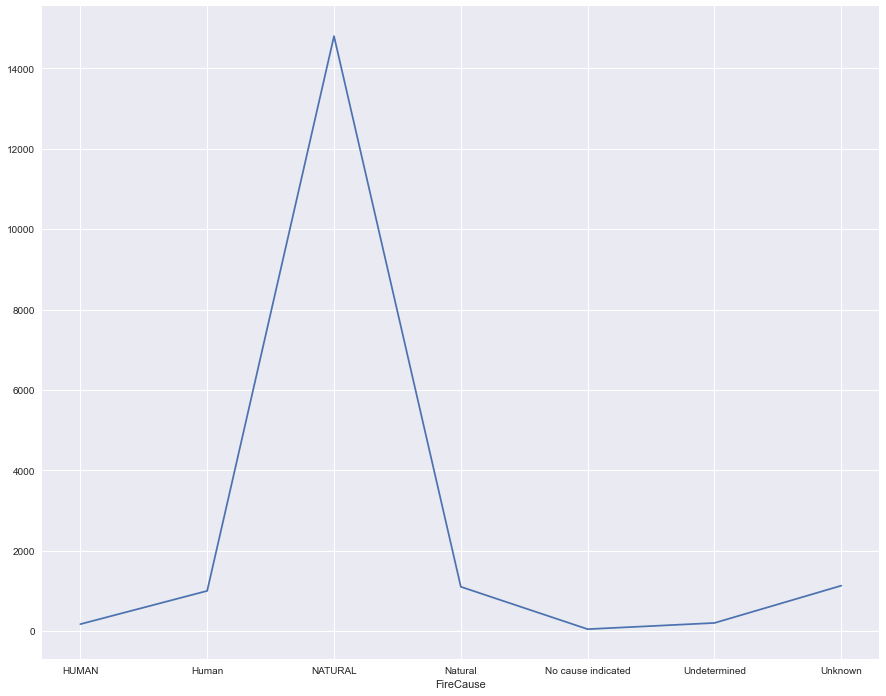

In [178]:
# create a figure and increase the size 
fig, ax = plt.subplots(figsize=(15, 12))

hasBoth.groupby('FireCause').Acres.mean().plot();

/usr/local/Caskroom/miniconda/base/envs/wildfires/lib/python3.7/site-packages/ipykernel_launcher.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator


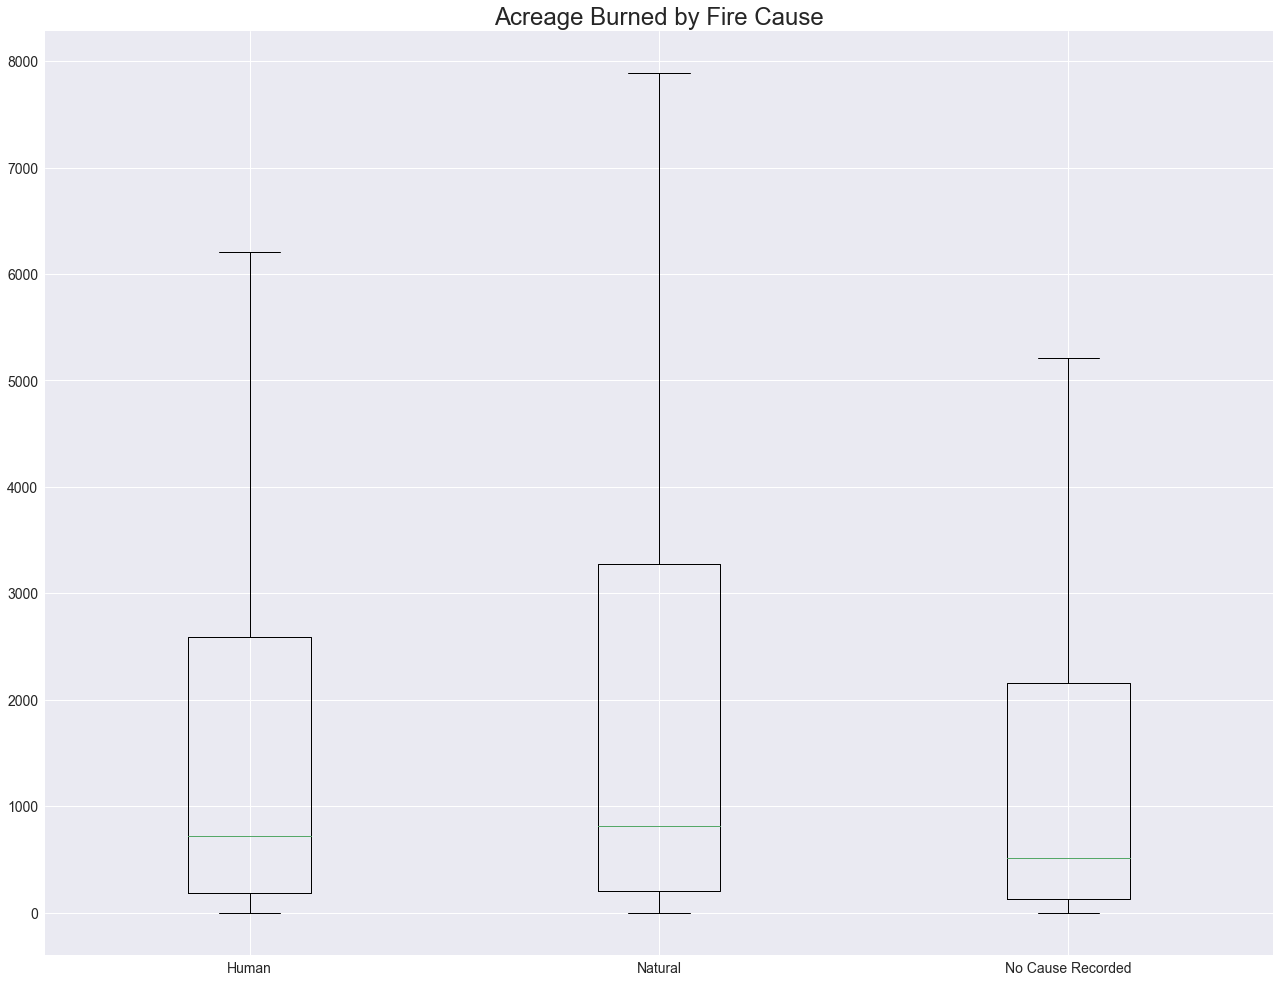

In [199]:
# Create variables for each fire cause category

human = hasBoth[(hasBoth['FireCause'] == 'HUMAN') | (hasBoth['FireCause'] == 'Human')]

natural = hasBoth[(hasBoth['FireCause'] == 'NATURAL') | (hasBoth['FireCause'] == 'Natural')]

noCause = hasBoth[(hasBoth['FireCause'] == 'No cause indicated') | (hasBoth['FireCause'] == 'Undetermined') | 
                  (hasBoth['FireCause'] == 'Unknown')]

# Access the acreage for each category

humanAcres = human.Acres

naturalAcres = natural.Acres

noCauseAcres = noCause.Acres

# create a box plot of fire causes

# all data to be plotted
data = [humanAcres, naturalAcres, noCauseAcres]

# create labels 
labels = ['Human', 'Natural', 'No Cause Recorded']
yLabels = list(range(-1000,10000,1000))

fig, ax = plt.subplots(figsize=(22, 17))
ax.set_title('Acreage Burned by Fire Cause', fontsize=24)
ax.boxplot(data, showfliers=False);
# ax.set_yticklabels(labels)
# ax.xaxis.grid(True)
ax.set_xticklabels(labels, fontsize=14)
ax.set_yticklabels(yLabels, fontsize=14)
ax.yaxis.grid(True)
